In [61]:
import sympy as sp
import script as rt
from IPython import display
from sympy.physics import mechanics
from IPython import display
from IPython.lib.display import IFrame
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sympy.physics import mechanics

In [62]:
t = sp.symbols('t')
mechanics.init_vprinting()  # за да скрати печатењето на (t) кај променливите кои зависат од времето

# 01.02.2021

Да се состави динамичкиот модел на рамнинската роботска рака од сликата 3, која се состои од два крака со маси 1m и 2m концентрирани на краевите.

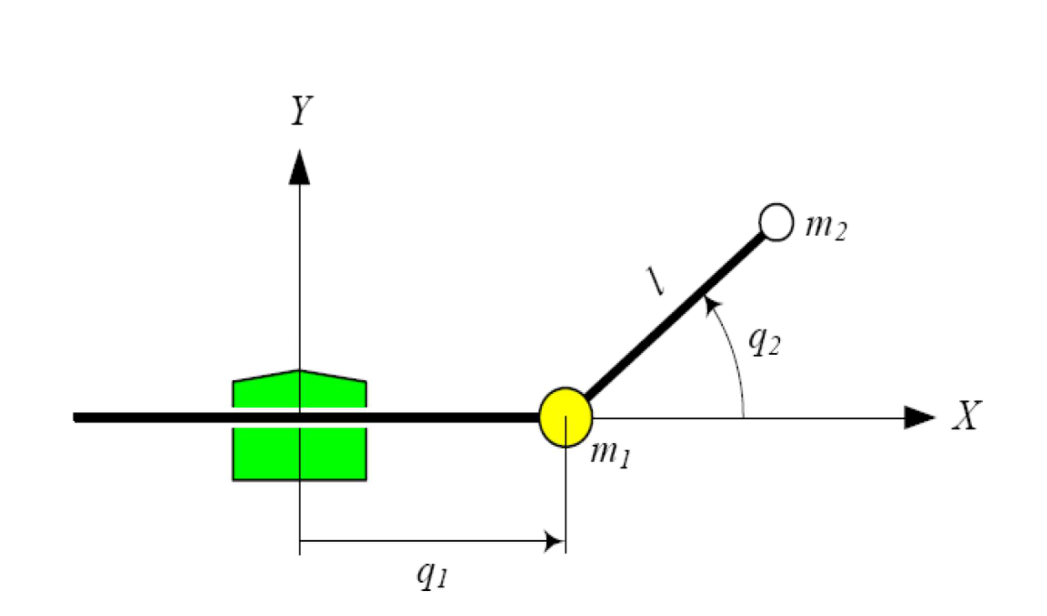

In [3]:
display.Image('images/2021.3.png', width=700)

In [4]:
m1, m2, g, l = sp.symbols('m1, m2, g, l')
theta2, d1= mechanics.dynamicsymbols('theta12, d1')

In [8]:
v12=d1.diff(t)**2
x2=d1+l*sp.cos(theta2)
y2=l*sp.sin(theta2)
v22=x2.diff(t)**2+y2.diff(t)**2
v22= v22.simplify()

In [9]:
K=m1*v12/2+m2*v22/2
K

     2      ⎛ 2    2                           2⎞
m₁⋅d₁̇    m₂⋅⎝l ⋅θ₁̇₂  - 2⋅l⋅sin(θ₁₂)⋅d₁̇⋅θ₁̇₂ + d₁̇ ⎠
────── + ────────────────────────────────────────
  2                         2                    

In [11]:
P=0+m2*g*l*sp.sin(theta2)
P

g⋅l⋅m₂⋅sin(θ₁₂)

In [12]:
L=K-P
L

                        2      ⎛ 2    2                           2⎞
                   m₁⋅d₁̇    m₂⋅⎝l ⋅θ₁̇₂  - 2⋅l⋅sin(θ₁₂)⋅d₁̇⋅θ₁̇₂ + d₁̇ ⎠
-g⋅l⋅m₂⋅sin(θ₁₂) + ────── + ────────────────────────────────────────
                     2                         2                    

In [13]:
rt.lagrangian(L, [theta2,d1])

⎡     l⋅m₂⋅(g⋅cos(θ₁₂) + l⋅θ₁̈₂ - sin(θ₁₂)⋅d₁̈)      ⎤
⎢                                                  ⎥
⎢           ⎛                               2     ⎞⎥
⎣m₁⋅d₁̈ - m₂⋅⎝l⋅sin(θ₁₂)⋅θ₁̈₂ + l⋅cos(θ₁₂)⋅θ₁̇₂  - d₁̈⎠⎦

In [14]:
rt.dynamic_model_with_4_matrices(L, [theta2, d1])

⎛⎡     2                               ⎤  ⎡         0           0⎤            
⎜⎢    l ⋅m₂⋅θ₁̈₂       -l⋅m₂⋅sin(θ₁₂)⋅d₁̈⎥  ⎢                      ⎥  ⎡0⎤  ⎡g⋅
⎜⎢                                     ⎥, ⎢                  2   ⎥, ⎢ ⎥, ⎢    
⎝⎣-l⋅m₂⋅sin(θ₁₂)⋅θ₁̈₂    (m₁ + m₂)⋅d₁̈   ⎦  ⎣-l⋅m₂⋅cos(θ₁₂)⋅θ₁̇₂   0⎦  ⎣0⎦  ⎣ 

            ⎞
l⋅m₂⋅cos(θ₁₂)⎤⎟
           ⎥⎟
      0       ⎦⎠

# 30.01.2023

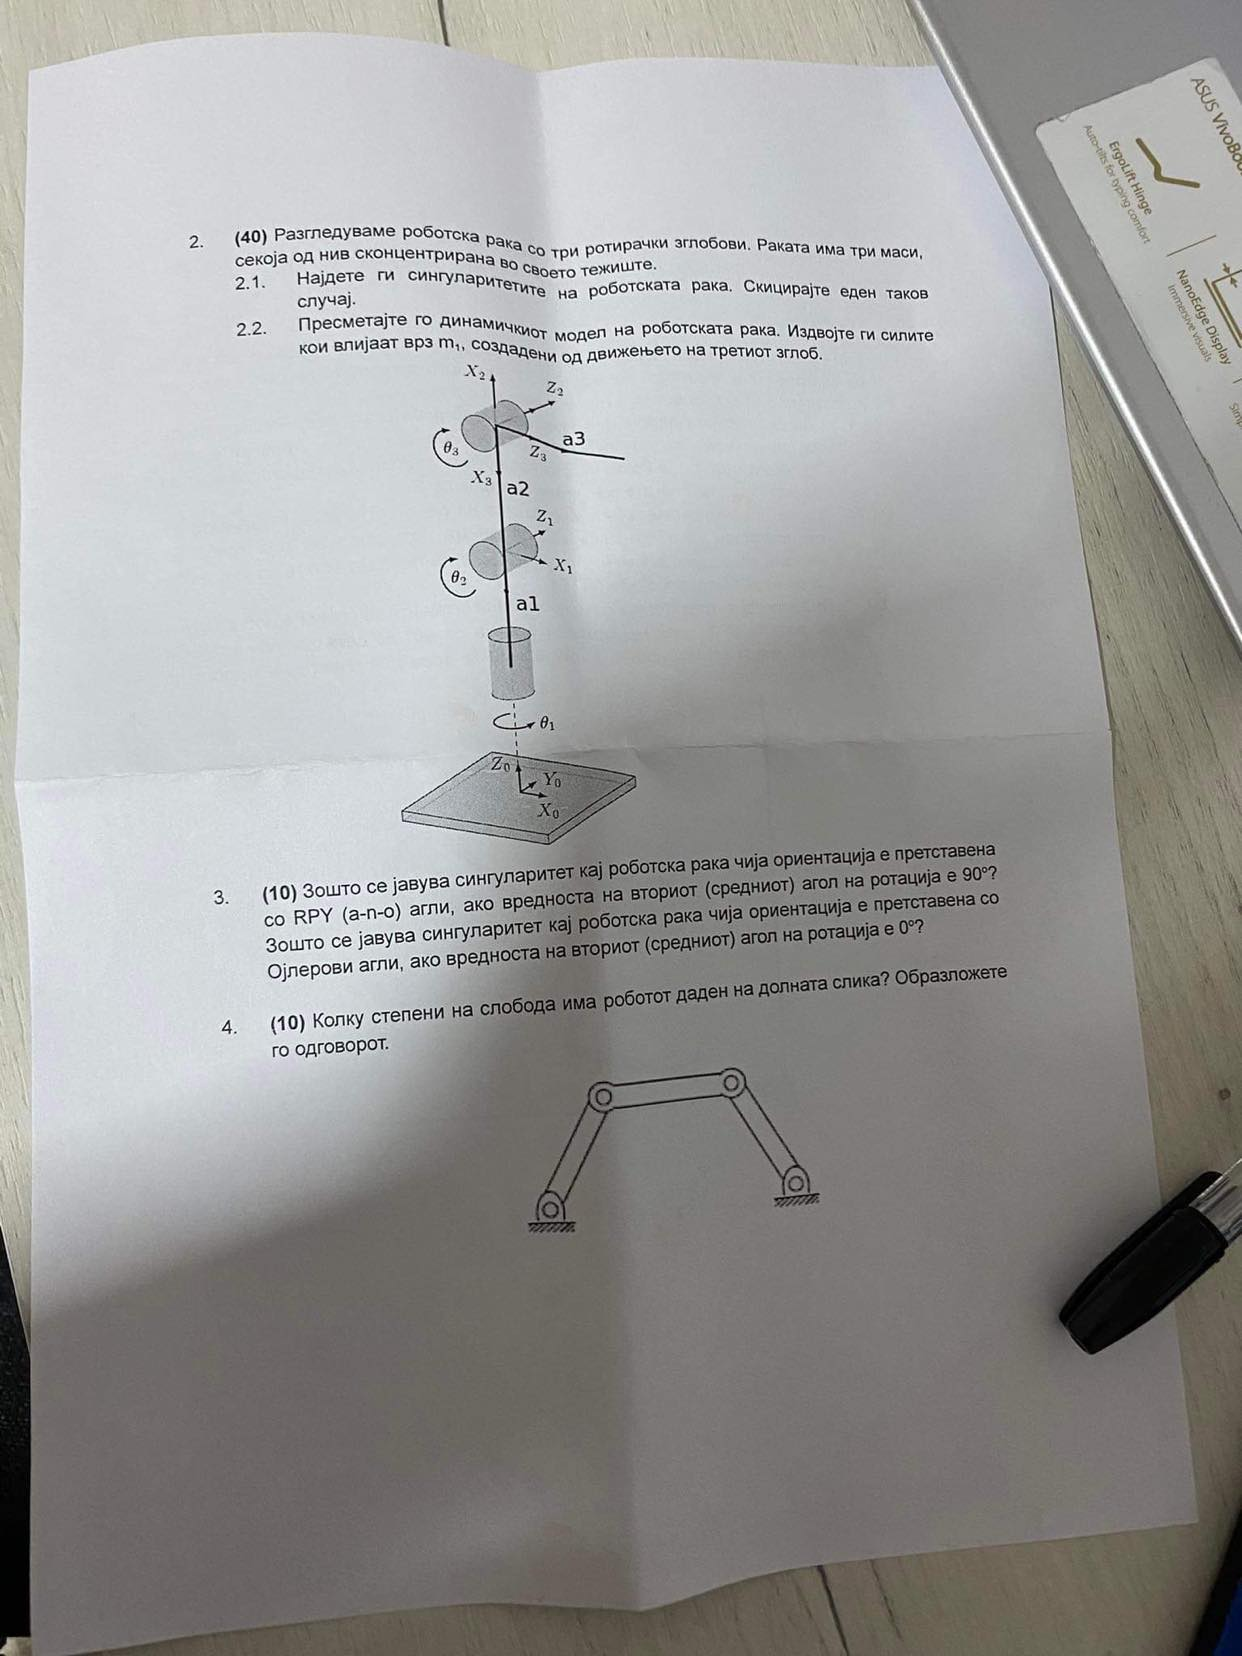

In [16]:
display.Image('images/30.01.2023.2.jpg', width=700)

In [4]:
theta1, theta2, theta3, a1, a2, a3  = sp.symbols('theta1, theta2, theta3, a1, a2, a3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1, 0, a1, -sp.pi/2)
robot.add_revolute_joint(theta2, 0, a2, -sp.pi/2)
robot.add_revolute_joint(theta3,0, a3, -sp.pi/2)
robot.add_subs([(a1, 1),(a2, 1),(a3, 1)])
robot.interact()

In [65]:
robot.get_dh_matrix()

⎡sin(θ₁)⋅sin(θ₃) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃)  sin(θ₂)⋅cos(θ₁)  sin(θ₁)⋅cos(θ₃) -
⎢                                                                             
⎢sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) - sin(θ₃)⋅cos(θ₁)  sin(θ₁)⋅sin(θ₂)  -sin(θ₁)⋅sin(θ₃)⋅
⎢                                                                             
⎢            -sin(θ₂)⋅cos(θ₃)                   cos(θ₂)                   sin(
⎢                                                                             
⎣                    0                             0                          

 sin(θ₃)⋅cos(θ₁)⋅cos(θ₂)   a₁⋅cos(θ₁) + a₂⋅cos(θ₁)⋅cos(θ₂) + a₃⋅sin(θ₁)⋅sin(θ₃
                                                                              
cos(θ₂) - cos(θ₁)⋅cos(θ₃)  a₁⋅sin(θ₁) + a₂⋅sin(θ₁)⋅cos(θ₂) + a₃⋅sin(θ₁)⋅cos(θ₂
                                                                              
θ₂)⋅sin(θ₃)                                           -(a₂ + a₃⋅cos(θ₃))⋅sin(θ
                                                   

In [19]:
Jv=robot.linear_jacobian()
Jv

⎡-a₁⋅sin(θ₁) - a₂⋅sin(θ₁)⋅cos(θ₂) - a₃⋅sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) + a₃⋅sin(θ₃)⋅co
⎢                                                                             
⎢a₁⋅cos(θ₁) + a₂⋅cos(θ₁)⋅cos(θ₂) + a₃⋅sin(θ₁)⋅sin(θ₃) + a₃⋅cos(θ₁)⋅cos(θ₂)⋅cos
⎢                                                                             
⎣                                        0                                    

s(θ₁)  -(a₂ + a₃⋅cos(θ₃))⋅sin(θ₂)⋅cos(θ₁)  a₃⋅(sin(θ₁)⋅cos(θ₃) - sin(θ₃)⋅cos(θ
                                                                              
(θ₃)   -(a₂ + a₃⋅cos(θ₃))⋅sin(θ₁)⋅sin(θ₂)  -a₃⋅(sin(θ₁)⋅sin(θ₃)⋅cos(θ₂) + cos(
                                                                              
           -(a₂ + a₃⋅cos(θ₃))⋅cos(θ₂)                    a₃⋅sin(θ₂)⋅sin(θ₃)   

₁)⋅cos(θ₂)) ⎤
            ⎥
θ₁)⋅cos(θ₃))⎥
            ⎥
            ⎦

In [20]:
det = sp.det(Jv).simplify()
det

   ⎛                          2                                ⎞        
a₃⋅⎝a₁⋅a₂ + a₁⋅a₃⋅cos(θ₃) + a₂ ⋅cos(θ₂) + a₂⋅a₃⋅cos(θ₂)⋅cos(θ₃)⎠⋅sin(θ₃)

In [21]:
# barame singulariteti koga theta 2 e vo prashanje
interval = sp.Interval(-sp.pi, sp.pi, left_open=True)
solution = sp.solveset(det, theta2, interval)
solution #singulariteti

⎧   │          ⎛                          2                                   
⎨θ₂ │ θ₂ ∊ ℝ ∧ ⎝a₁⋅a₂ + a₁⋅a₃⋅cos(θ₃) + a₂ ⋅cos(θ₂) + a₂⋅a₃⋅cos(θ₂)⋅cos(θ₃) = 
⎩   │                                                                         

 ⎞⎫
0⎠⎬
  ⎭

In [22]:
# barame singulariteti koga theta 3 e vo prashanje
interval = sp.Interval(-sp.pi, sp.pi, left_open=True)
solution = sp.solveset(det, theta3, interval)
solution #singulariteti

         ⎧   │          ⎛                          2                          
{0, π} ∪ ⎨θ₃ │ θ₃ ∊ ℝ ∧ ⎝a₁⋅a₂ + a₁⋅a₃⋅cos(θ₃) + a₂ ⋅cos(θ₂) + a₂⋅a₃⋅cos(θ₂)⋅c
         ⎩   │                                                                

          ⎞⎫
os(θ₃) = 0⎠⎬
           ⎭

* koga theta3=pi, izvrshniot element kje se poklopi so vtoriot zglob so shto lokalnata z oska na izvrshniot element kje se poklopi so x oskata na vtoriot zglob, a x oskata so z oskata na zglobot

In [23]:
robot.get_dh_matrix()

⎡sin(θ₁)⋅sin(θ₃) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃)  sin(θ₂)⋅cos(θ₁)  sin(θ₁)⋅cos(θ₃) -
⎢                                                                             
⎢sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) - sin(θ₃)⋅cos(θ₁)  sin(θ₁)⋅sin(θ₂)  -sin(θ₁)⋅sin(θ₃)⋅
⎢                                                                             
⎢            -sin(θ₂)⋅cos(θ₃)                   cos(θ₂)                   sin(
⎢                                                                             
⎣                    0                             0                          

 sin(θ₃)⋅cos(θ₁)⋅cos(θ₂)   a₁⋅cos(θ₁) + a₂⋅cos(θ₁)⋅cos(θ₂) + a₃⋅sin(θ₁)⋅sin(θ₃
                                                                              
cos(θ₂) - cos(θ₁)⋅cos(θ₃)  a₁⋅sin(θ₁) + a₂⋅sin(θ₁)⋅cos(θ₂) + a₃⋅sin(θ₁)⋅cos(θ₂
                                                                              
θ₂)⋅sin(θ₃)                                           -(a₂ + a₃⋅cos(θ₃))⋅sin(θ
                                                   

In [10]:
m1, m2, m3, g, a1, a2, a3 = sp.symbols('m1, m2, m3, g, a1, a2, a3')
theta2, theta1, theta3 = mechanics.dynamicsymbols('theta2, theta1, theta3')

In [11]:
K1=0

In [22]:
x2=a2*sp.sin(theta2)
z2=a1+a2*sp.cos(theta2)
v22=x2.diff(t)**2+z2.diff(t)**2
v22 = v22.simplify()
v22

  2   2
a₂ ⋅θ₂̇ 

In [23]:
x3=a2*sp.sin(theta2)+a3*sp.sin(theta2+theta3)
z3=a1+a2*sp.cos(theta2)-a3*sp.cos(theta2+theta3)
v32=x3.diff(t)**2+z3.diff(t)**2
v32 = v32.simplify()
v32

                                           2                                  
(a₂⋅sin(θ₂)⋅θ₂̇ - a₃⋅(θ₂̇ + θ₃̇)⋅sin(θ₂ + θ₃))  + (a₂⋅cos(θ₂)⋅θ₂̇ + a₃⋅(θ₂̇ + 

            2
θ₃̇)⋅cos(θ₂ + θ₃)) 

In [24]:
K= K1+ m2*v22/2 +m3*v32/2
K

  2      2      ⎛                                           2                 
a₂ ⋅m₂⋅θ₂̇    m₃⋅⎝(a₂⋅sin(θ₂)⋅θ₂̇ - a₃⋅(θ₂̇ + θ₃̇)⋅sin(θ₂ + θ₃))  + (a₂⋅cos(θ₂
────────── + ─────────────────────────────────────────────────────────────────
    2                                                       2                 

                             2⎞
)⋅θ₂̇ + a₃⋅(θ₂̇ + θ₃̇)⋅cos(θ₂ + θ₃)) ⎠
───────────────────────────────
                               

In [25]:
P=m1*g*a1 + m2*g*z2 + m3*g*z3
P

a₁⋅g⋅m₁ + g⋅m₂⋅(a₁ + a₂⋅cos(θ₂)) + g⋅m₃⋅(a₁ + a₂⋅cos(θ₂) - a₃⋅cos(θ₂ + θ₃))

In [26]:
L=K-P
L

             2      2                                                         
           a₂ ⋅m₂⋅θ₂̇                                                         
-a₁⋅g⋅m₁ + ────────── - g⋅m₂⋅(a₁ + a₂⋅cos(θ₂)) - g⋅m₃⋅(a₁ + a₂⋅cos(θ₂) - a₃⋅co
               2                                                              

                 ⎛                                           2                
               m₃⋅⎝(a₂⋅sin(θ₂)⋅θ₂̇ - a₃⋅(θ₂̇ + θ₃̇)⋅sin(θ₂ + θ₃))  + (a₂⋅cos(θ
s(θ₂ + θ₃)) + ────────────────────────────────────────────────────────────────
                                                             2                

                              2⎞
₂)⋅θ₂̇ + a₃⋅(θ₂̇ + θ₃̇)⋅cos(θ₂ + θ₃)) ⎠
────────────────────────────────
                                

In [27]:
rt.lagrangian(L,[theta1,theta2,theta3])

⎡                                                                             
⎢                                                                             
⎢  2           2       2            2       2                                 
⎢a₂ ⋅m₂⋅θ₂̈ + a₂ ⋅m₃⋅sin (θ₂)⋅θ₂̈ + a₂ ⋅m₃⋅cos (θ₂)⋅θ₂̈ - 2⋅a₂⋅a₃⋅m₃⋅sin(θ₂ + 
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                                              
                                                                              
                                                                              
θ₃)⋅sin(θ₂)⋅θ₂̈ - a₂⋅a₃⋅m₃⋅sin(θ₂ + θ₃)⋅sin(θ₂)⋅θ₃̈ - 2⋅a₂⋅a₃⋅m₃⋅sin(θ₂ + θ₃)⋅
                                                                              
                                                   

# 03.02.2020

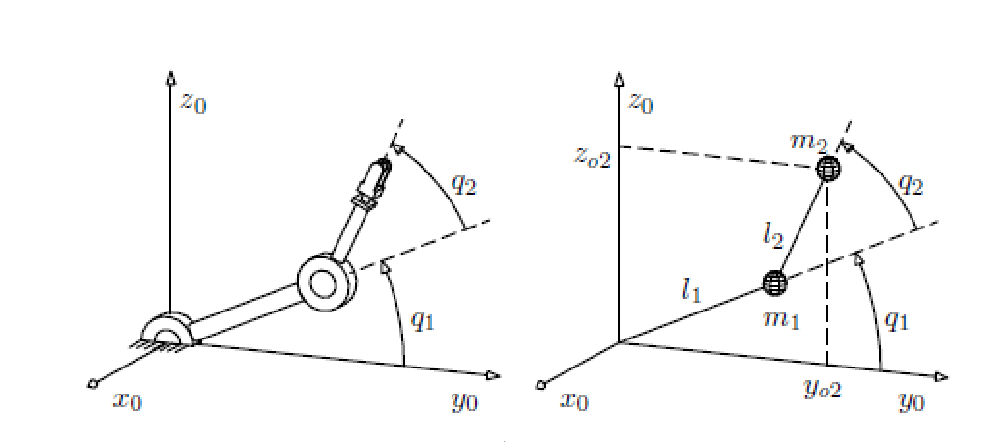

In [28]:
display.Image('images/3.2.2.20.png', width=700)

In [62]:
theta1, theta2, l1, l2  = sp.symbols('theta1, theta2, l1, l2')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1, 0, l1, 0)
robot.add_revolute_joint(theta2, 0, l2, 0)
robot.add_subs([(l1, 1),(l2, 1)])
robot.interact()

In [63]:
robot.get_dh_matrix()

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

In [30]:
m1, m2, g, l1, l2 = sp.symbols('m1, m2, g, l1, l2')
theta2, theta1 = mechanics.dynamicsymbols('theta2, theta1')

In [33]:
x1=l1*sp.cos(theta1)
y1=l1*sp.sin(theta1)
v12=x1.diff(t)**2+y1.diff(t)**2
v12=v12.simplify()
v12

  2   2
l₁ ⋅θ₁̇ 

In [34]:
x2=l1*sp.cos(theta1)+l2*sp.cos(theta1+theta2)
y2=l1*sp.sin(theta1)+l2*sp.sin(theta1+theta2)
v22=x2.diff(t)**2+y2.diff(t)**2
v22=v22.simplify()
v22

  2   2                     2                             2   2       2       
l₁ ⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ

    2   2
₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ 

In [35]:
K=m1*v12/2+m2*v22/2
K

  2      2      ⎛  2   2                     2                             2  
l₁ ⋅m₁⋅θ₁̇    m₂⋅⎝l₁ ⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + 
────────── + ─────────────────────────────────────────────────────────────────
    2                                                     2                   

 2       2           2   2⎞
l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ ⎠
───────────────────────────
                           

In [36]:
P=(m1+m2)*g*l1*sp.sin(theta1)+m2*l2*sp.sin(theta1+theta2)
P

g⋅l₁⋅(m₁ + m₂)⋅sin(θ₁) + l₂⋅m₂⋅sin(θ₁ + θ₂)

In [37]:
L=K-P
L

                            2      2                           ⎛  2   2       
                          l₁ ⋅m₁⋅θ₁̇                         m₂⋅⎝l₁ ⋅θ₁̇  + 2⋅
-g⋅l₁⋅(m₁ + m₂)⋅sin(θ₁) + ────────── - l₂⋅m₂⋅sin(θ₁ + θ₂) + ──────────────────
                              2                                               

              2                             2   2       2           2   2⎞
l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ₁̇⋅θ₂̇ + l₂ ⋅
──────────────────────────────────────────────────────────────────────────
                           2                                              

In [39]:
rt.lagrangian(L,[theta1,theta2])

⎡                           2                                 ⎛  2            
⎢g⋅l₁⋅(m₁ + m₂)⋅cos(θ₁) + l₁ ⋅m₁⋅θ₁̈ + l₂⋅m₂⋅cos(θ₁ + θ₂) + m₂⋅⎝l₁ ⋅θ₁̈ - 2⋅l₁
⎢                                                                             
⎢                                                         ⎛             2     
⎣                                                   l₂⋅m₂⋅⎝l₁⋅sin(θ₂)⋅θ₁̇  + l

                                  2                                           
⋅l₂⋅sin(θ₂)⋅θ₁̇⋅θ₂̇ - l₁⋅l₂⋅sin(θ₂)⋅θ₂̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̈ + l₁⋅l₂⋅cos(θ₂)
                                                                              
                                          ⎞                                   
₁⋅cos(θ₂)⋅θ₁̈ + l₂⋅θ₁̈ + l₂⋅θ₂̈ + cos(θ₁ + θ₂)⎠                               

  2        2   ⎞⎤
⋅θ₂̈ + l₂ ⋅θ₁̈ + l₂ ⋅θ₂̈⎠⎥
                ⎥
                ⎥
                    ⎦

In [40]:
rt.dynamic_model_with_4_matrices(L, [theta1, theta2])

⎛⎡⎛  2        2                             2   ⎞                             
⎜⎢⎝l₁ ⋅m₁ + l₁ ⋅m₂ + 2⋅l₁⋅l₂⋅m₂⋅cos(θ₂) + l₂ ⋅m₂⎠⋅θ₁̈  l₂⋅m₂⋅(l₁⋅cos(θ₂) + l₂)
⎜⎢                                                                            
⎜⎢                                                              2             
⎝⎣            l₂⋅m₂⋅(l₁⋅cos(θ₂) + l₂)⋅θ₁̈                      l₂ ⋅m₂⋅θ₂̈     

  ⎤  ⎡                                          2⎤                            
⋅θ₂̈⎥  ⎢         0            -l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₂̇ ⎥  ⎡-2⋅l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₁
  ⎥, ⎢                                           ⎥, ⎢                         
  ⎥  ⎢                   2                       ⎥  ⎣            0            
    ⎦  ⎣l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₁̇             0          ⎦                         

                                                           ⎞
̇⋅θ₂̇⎤  ⎡g⋅l₁⋅m₁⋅cos(θ₁) + g⋅l₁⋅m₂⋅cos(θ₁) + l₂⋅m₂⋅cos(θ₁ + θ₂)⎤⎟
⎥, ⎢                                                      ⎥⎟
⎦  ⎣                

# 23.09.2021

Да се проектира кубна траекторија која оди од положбата q(to)=1 до
положбата q(t1)=3 и ги задоволува следните ограничувања: a(to)=a(t1)=0, t0=0 t1=1

In [44]:
ti, tf = 0, 1
theta, solution = rt.trajectory_polynomial_3(ti, tf, xi=1, xf=3,vi=2,vf=2)
theta, solution

(2⋅t + 1, {(1, 2, 0, 0)})

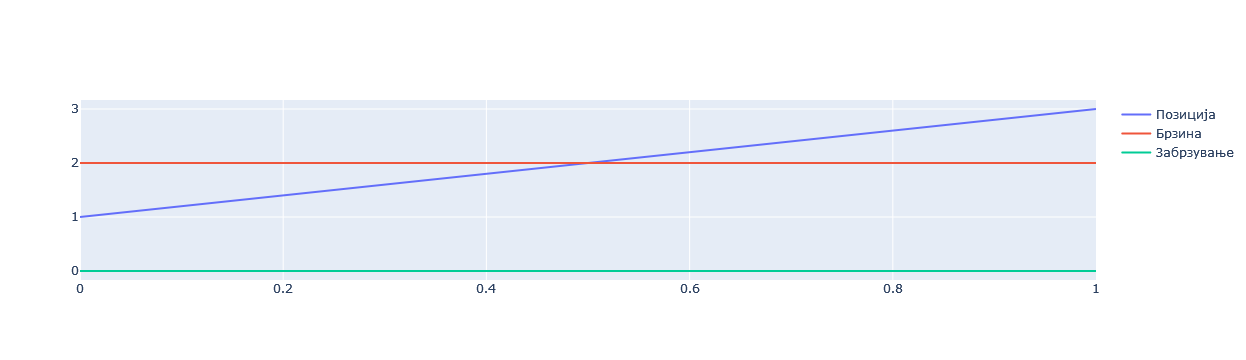

In [45]:
rt.plot_trajectories([(theta, ti, tf)])

# 12.02.2021

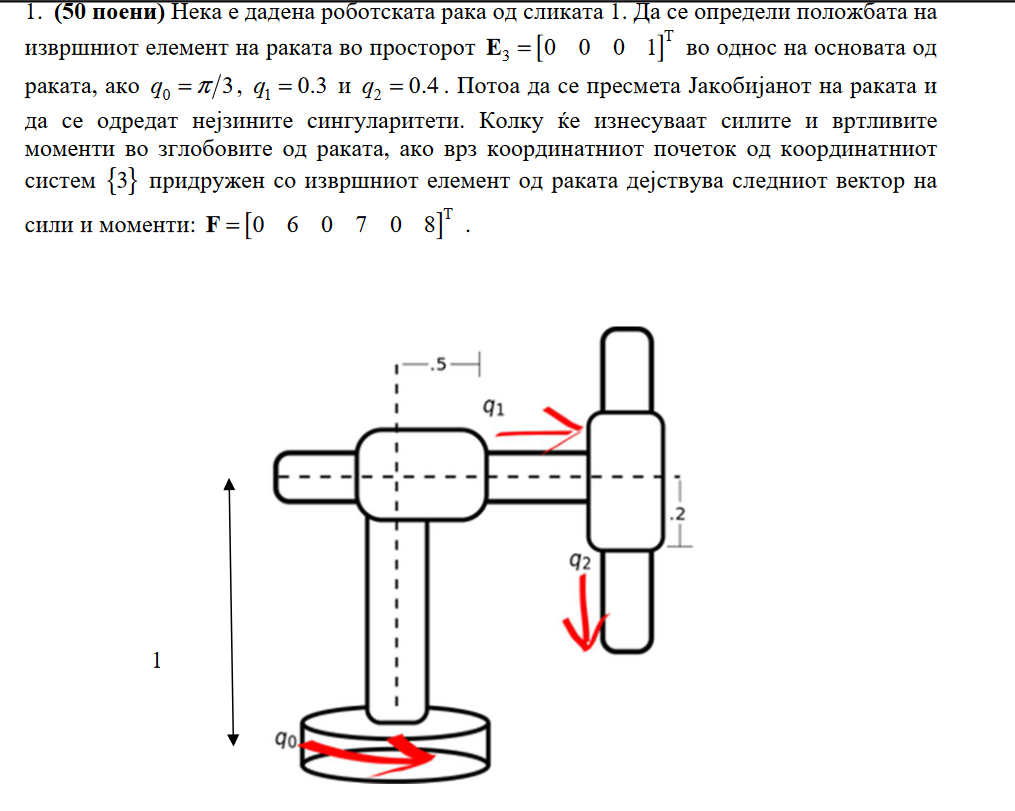

In [43]:
display.Image('images/12.2.21.png', width=700)

In [4]:
theta1, theta2, theta3, l3, l1, l2  = sp.symbols('theta1, theta2, theta3, l3, l1, l2')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1, 0, l1, -sp.pi/2)
robot.add_revolute_joint(theta2, 0, l2, -sp.pi/2)
robot.add_revolute_joint(theta3, 0, l3, 0)
robot.add_subs([(l1, 1),(l2, 1),(l3, 1)])
robot.interact()

In [5]:
T=robot.get_dh_joint_to_joint(0,3)
T

⎡sin(θ₁)⋅sin(θ₃) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₃)  sin(θ₁)⋅cos(θ₃) - sin(θ₃)⋅cos(θ₁)⋅
⎢                                                                             
⎢sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) - sin(θ₃)⋅cos(θ₁)  -sin(θ₁)⋅sin(θ₃)⋅cos(θ₂) - cos(θ₁)
⎢                                                                             
⎢            -sin(θ₂)⋅cos(θ₃)                            sin(θ₂)⋅sin(θ₃)      
⎢                                                                             
⎣                    0                                          0             

cos(θ₂)   -sin(θ₂)⋅cos(θ₁)  l₁⋅cos(θ₁) + l₂⋅cos(θ₁)⋅cos(θ₂) + l₃⋅sin(θ₁)⋅sin(θ
                                                                              
⋅cos(θ₃)  -sin(θ₁)⋅sin(θ₂)  l₁⋅sin(θ₁) + l₂⋅sin(θ₁)⋅cos(θ₂) + l₃⋅sin(θ₁)⋅cos(θ
                                                                              
              -cos(θ₂)                                 -(l₂ + l₃⋅cos(θ₃))⋅sin(
                                                   

In [6]:
T= T.subs(theta1,sp.pi/3).subs(theta2,0.3).subs(theta3,0.4)
T

⎡                                                                             
⎢0.194709171154325⋅√3 + 0.439961588140629   -0.18601277597113 + 0.460530497001
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢-0.194709171154325 + 0.439961588140629⋅√3  -0.460530497001443 - 0.18601277597
⎢                                                                             
⎢                                                                             
⎢           -0.272192135295431                         0.115080988996769      
⎢                                                                             
⎣                    0                                         0              

                                 l₁                                           
443⋅√3   -0.14776010333067       ── + 0.47766824456

In [7]:
Jv=robot.linear_jacobian()
Jv

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁)⋅cos(θ₂) - l₃⋅sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) + l₃⋅sin(θ₃)⋅co
⎢                                                                             
⎢l₁⋅cos(θ₁) + l₂⋅cos(θ₁)⋅cos(θ₂) + l₃⋅sin(θ₁)⋅sin(θ₃) + l₃⋅cos(θ₁)⋅cos(θ₂)⋅cos
⎢                                                                             
⎣                                        0                                    

s(θ₁)  -(l₂ + l₃⋅cos(θ₃))⋅sin(θ₂)⋅cos(θ₁)  l₃⋅(sin(θ₁)⋅cos(θ₃) - sin(θ₃)⋅cos(θ
                                                                              
(θ₃)   -(l₂ + l₃⋅cos(θ₃))⋅sin(θ₁)⋅sin(θ₂)  -l₃⋅(sin(θ₁)⋅sin(θ₃)⋅cos(θ₂) + cos(
                                                                              
           -(l₂ + l₃⋅cos(θ₃))⋅cos(θ₂)                    l₃⋅sin(θ₂)⋅sin(θ₃)   

₁)⋅cos(θ₂)) ⎤
            ⎥
θ₁)⋅cos(θ₃))⎥
            ⎥
            ⎦

In [8]:
det =sp.det(Jv).simplify()
det

   ⎛                          2                                ⎞        
l₃⋅⎝l₁⋅l₂ + l₁⋅l₃⋅cos(θ₃) + l₂ ⋅cos(θ₂) + l₂⋅l₃⋅cos(θ₂)⋅cos(θ₃)⎠⋅sin(θ₃)

In [54]:
# barame singulariteti koga theta 3 e vo prashanje
interval = sp.Interval(-sp.pi, sp.pi, left_open=True)
solution = sp.solveset(det, theta3, interval)
solution #singulariteti

         ⎧   │          ⎛                          2                          
{0, π} ∪ ⎨θ₃ │ θ₃ ∊ ℝ ∧ ⎝l₁⋅l₂ + l₁⋅l₃⋅cos(θ₃) + l₂ ⋅cos(θ₂) + l₂⋅l₃⋅cos(θ₂)⋅c
         ⎩   │                                                                

          ⎞⎫
os(θ₃) = 0⎠⎬
           ⎭

In [55]:
# barame singulariteti koga theta 2 e vo prashanje
interval = sp.Interval(-sp.pi, sp.pi, left_open=True)
solution = sp.solveset(det, theta2, interval)
solution #singulariteti

⎧   │          ⎛                          2                                   
⎨θ₂ │ θ₂ ∊ ℝ ∧ ⎝l₁⋅l₂ + l₁⋅l₃⋅cos(θ₃) + l₂ ⋅cos(θ₂) + l₂⋅l₃⋅cos(θ₂)⋅cos(θ₃) = 
⎩   │                                                                         

 ⎞⎫
0⎠⎬
  ⎭

In [9]:
J=robot.jacobian()
J

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁)⋅cos(θ₂) - l₃⋅sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) + l₃⋅sin(θ₃)⋅co
⎢                                                                             
⎢l₁⋅cos(θ₁) + l₂⋅cos(θ₁)⋅cos(θ₂) + l₃⋅sin(θ₁)⋅sin(θ₃) + l₃⋅cos(θ₁)⋅cos(θ₂)⋅cos
⎢                                                                             
⎢                                        0                                    
⎢                                                                             
⎢                                        0                                    
⎢                                                                             
⎢                                        0                                    
⎢                                                                             
⎣                                        1                                    

s(θ₁)  -(l₂ + l₃⋅cos(θ₃))⋅sin(θ₂)⋅cos(θ₁)  l₃⋅(sin(θ₁)⋅cos(θ₃) - sin(θ₃)⋅cos(θ
                                                   

In [10]:
F=sp.Matrix([0,6,0,7,0,8])
F

⎡0⎤
⎢ ⎥
⎢6⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢7⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣8⎦

In [11]:
T=J.T*F
T

⎡6⋅l₁⋅cos(θ₁) + 6⋅l₂⋅cos(θ₁)⋅cos(θ₂) + 6⋅l₃⋅sin(θ₁)⋅sin(θ₃) + 6⋅l₃⋅cos(θ₁)⋅cos
⎢                                                                             
⎢                      -6⋅(l₂ + l₃⋅cos(θ₃))⋅sin(θ₁)⋅sin(θ₂) - 7⋅sin(θ₁)       
⎢                                                                             
⎣      -6⋅l₃⋅(sin(θ₁)⋅sin(θ₃)⋅cos(θ₂) + cos(θ₁)⋅cos(θ₃)) - 7⋅sin(θ₂)⋅cos(θ₁) -

(θ₂)⋅cos(θ₃) + 8⎤
                ⎥
                ⎥
                ⎥
 8⋅cos(θ₂)      ⎦

In [12]:
T.subs(theta1,sp.pi/3).subs(theta2,0.3).subs(theta3,0.4)

⎡3⋅l₁ + 2.86600946737682⋅l₂ + 1.16825502692595⋅√3⋅l₃ + 2.63976952884377⋅l₃ + 8
⎢                                                                             
⎢                                                              7⋅√3           
⎢          -0.886560619984019⋅√3⋅(l₂ + 0.921060994002885⋅l₃) - ────           
⎢                                                               2             
⎢                                                                             
⎣     -6⋅l₃⋅(0.18601277597113⋅√3 + 0.460530497001443) - 8.67701263631954      

⎤
⎥
⎥
⎥
⎥
⎥
⎦

# 30.01.2023

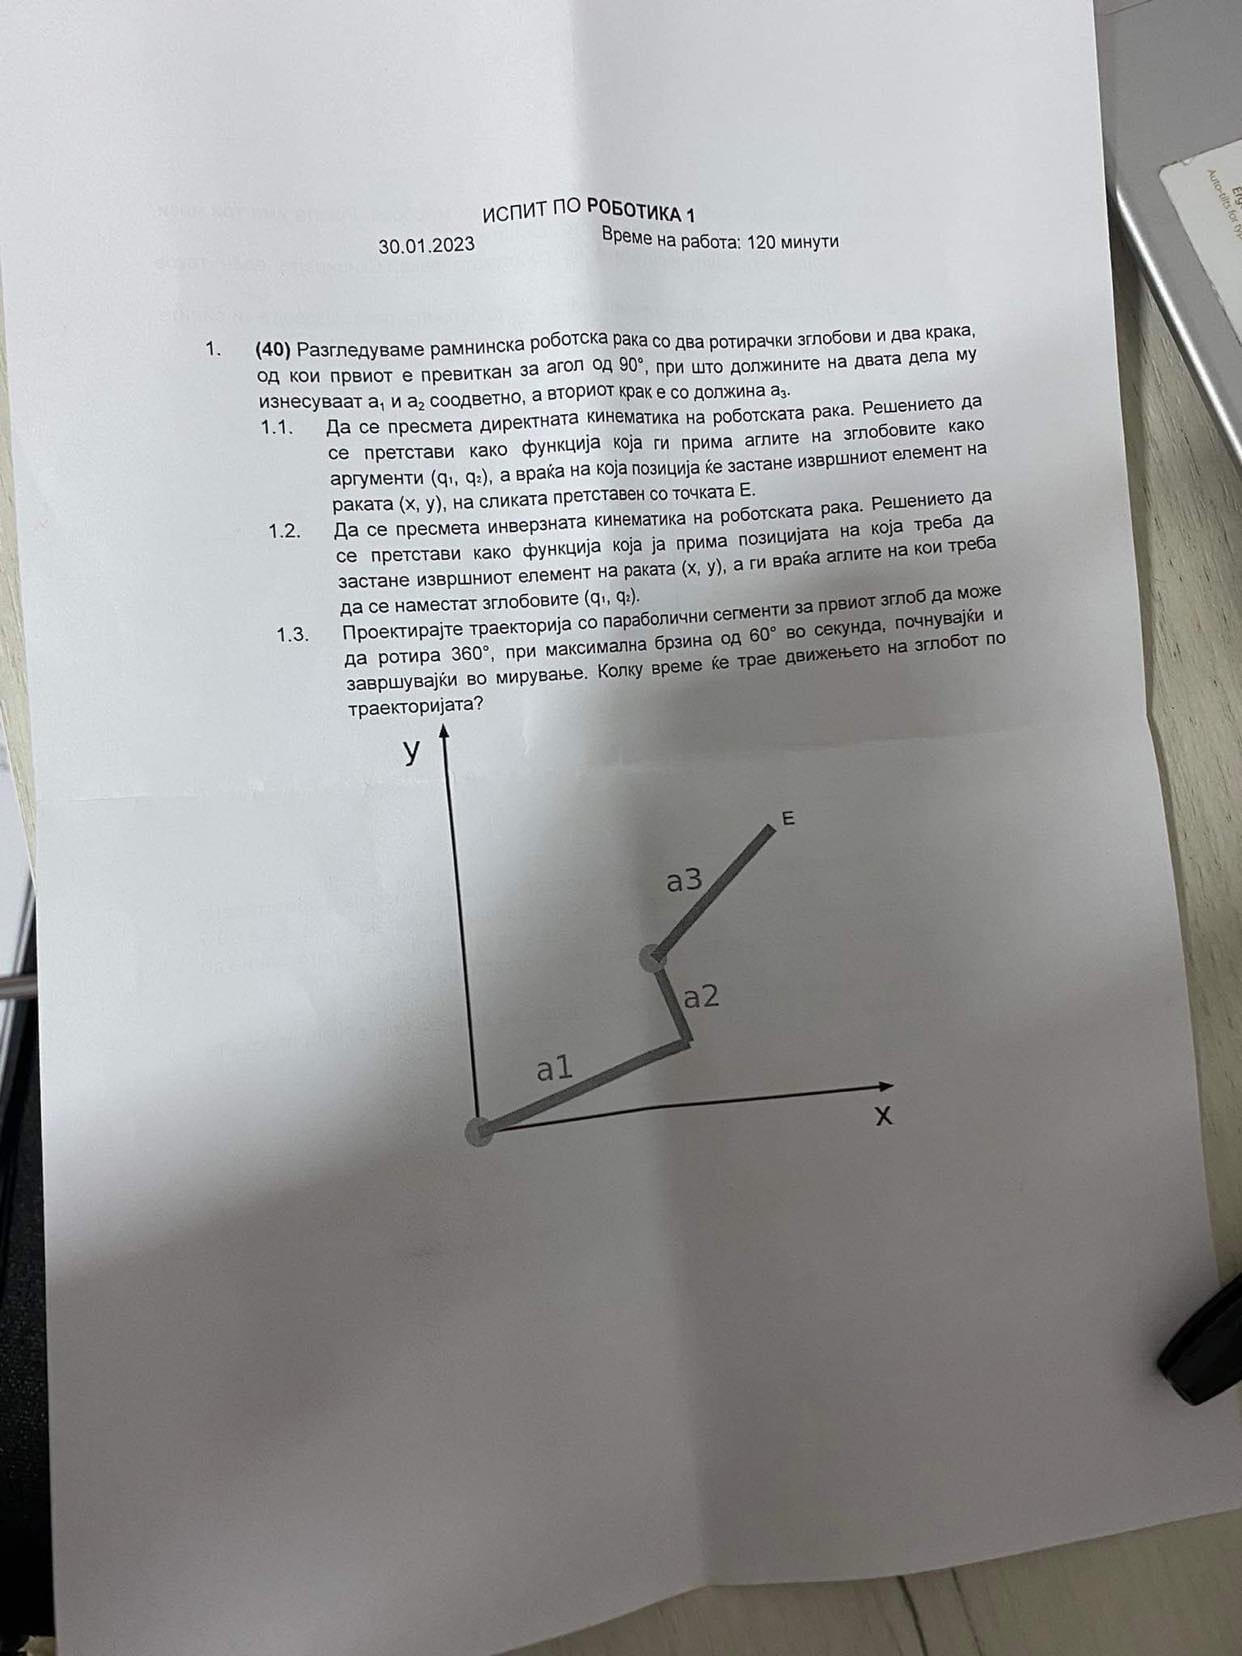

In [13]:
display.Image('images/30.01.2023.jpg', width=700)

In [24]:
theta1, theta2, a, a3 = sp.symbols('theta1, theta2, a, a3') # a= sqrt(a1**2+a2**2)
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1, 0, a, 0)
robot.add_revolute_joint(theta2, 0, a3, 0)
robot.add_subs([(a, 1),(a3, 1)])
robot.interact()

In [28]:
tf = 7
ti = 0 # od s=v*t => 360/60 
theta_s1, theta_s2, theta_s3, w, tb = rt.trajectory_linear_parabolic_segments(ti, tf, xi=0, xf=360, w=60)
theta_s1, theta_s2, theta_s3, w, tb

⎛      2                                 2         ⎞
⎝30.0⋅t , 60⋅t - 30.0, 360 - 30.0⋅(7 - t) , 60, 1.0⎠

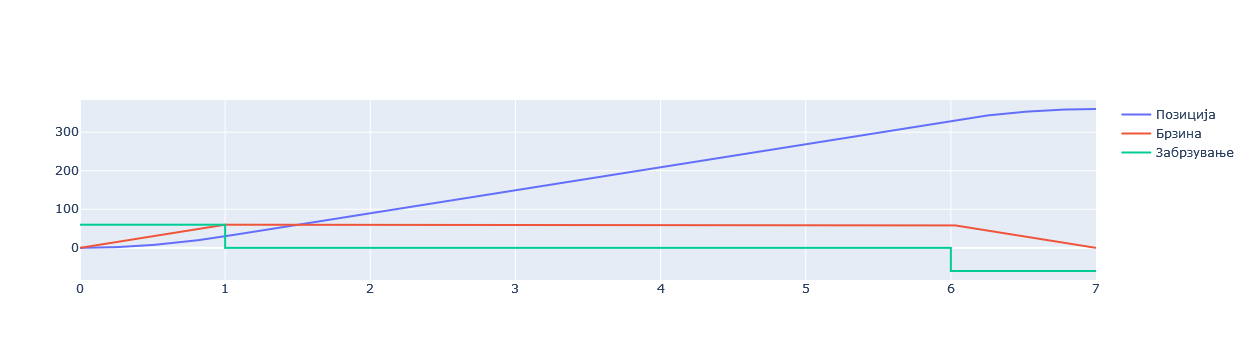

In [29]:
rt.plot_trajectories([(theta_s1, ti, tb), (theta_s2, tb, tf-tb), (theta_s3, tf-tb, tf)])

* spored pravilo tb>tf/2, nas vremeto za koe rotira ni e 6, pa zatoa mora tf da e pogolemo od 6 

# 11.04.2022

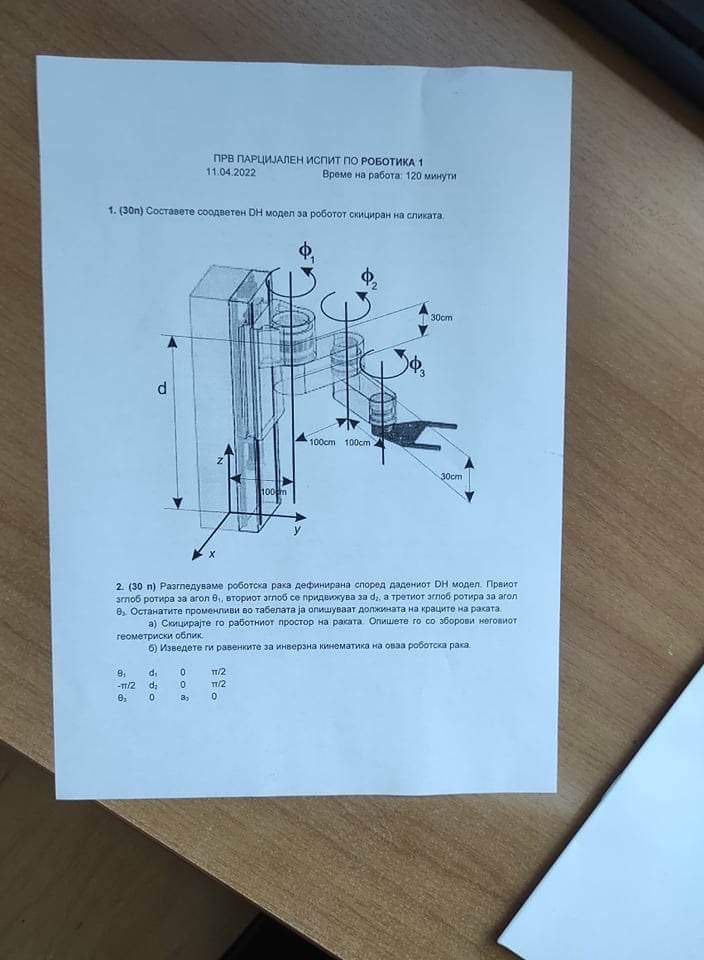

In [21]:
display.Image('images/11.04.2022-1,2.jpg', width=700)

In [47]:
d1, theta2, theta3, theta4 = sp.symbols('d1, theta2, theta3, theta4') 
robot = rt.SerialLinkRobot()
robot.add_prismatic_joint(0,d1,0,0)
robot.add_revolute_joint(theta2,0,1,0)
robot.add_revolute_joint(theta3,0,1,0)
robot.add_revolute_joint(theta4,-0.3,1,0)
robot.interact()

In [48]:
Jv= robot.linear_jacobian()
Jv

⎡0  -sin(θ₂) - sin(θ₂ + θ₃) - sin(θ₂ + θ₃ + θ₄)  -sin(θ₂ + θ₃) - sin(θ₂ + θ₃ +
⎢                                                                             
⎢0  cos(θ₂) + cos(θ₂ + θ₃) + cos(θ₂ + θ₃ + θ₄)   cos(θ₂ + θ₃) + cos(θ₂ + θ₃ + 
⎢                                                                             
⎣1                       0                                       0            

 θ₄)  -sin(θ₂ + θ₃ + θ₄)⎤
                        ⎥
θ₄)   cos(θ₂ + θ₃ + θ₄) ⎥
                        ⎥
              0         ⎦

In [54]:
Jvv = Jv[:2,1:3]
Jvv

⎡-sin(θ₂) - sin(θ₂ + θ₃) - sin(θ₂ + θ₃ + θ₄)  -sin(θ₂ + θ₃) - sin(θ₂ + θ₃ + θ₄
⎢                                                                             
⎣cos(θ₂) + cos(θ₂ + θ₃) + cos(θ₂ + θ₃ + θ₄)   cos(θ₂ + θ₃) + cos(θ₂ + θ₃ + θ₄)

)⎤
 ⎥
 ⎦

In [57]:
det = sp.det(Jvv)
det

-sin(θ₂)⋅cos(θ₂ + θ₃) - sin(θ₂)⋅cos(θ₂ + θ₃ + θ₄) + sin(θ₂ + θ₃)⋅cos(θ₂) + sin
(θ₂ + θ₃ + θ₄)⋅cos(θ₂)

In [58]:
# barame singulariteti koga theta 2 e vo prashanje
interval = sp.Interval(-sp.pi, sp.pi, left_open=True)
solution = sp.solveset(det, theta2, interval)
solution #singulariteti

∅

In [59]:
# barame singulariteti koga theta 3 e vo prashanje
interval = sp.Interval(-sp.pi, sp.pi, left_open=True)
solution = sp.solveset(det, theta3, interval)
solution #singulariteti

⎛      ⎧   ⎛  ⎛           ⎛   ________⎞⎞      ⎛│   ________│⎞⎞ │            ⎫⎞
⎜      ⎨   ⎜  ⎜           ⎜  ╱  -ⅈ⋅θ₄ ⎟⎟      ⎜│  ╱  -ⅈ⋅θ₄ │⎟⎟ │            ⎬⎟
⎝{0} ∩ ⎩-ⅈ⋅⎝ⅈ⋅⎝2⋅n⋅π + arg⎝╲╱  ℯ      ⎠⎠ + log⎝│╲╱  ℯ      │⎠⎠ │ n ∊ (-π, π]⎭⎠

   ⎛      ⎧   ⎛  ⎛           ⎛    ________⎞⎞      ⎛│   ________│⎞⎞ │          
   ⎜      ⎨   ⎜  ⎜           ⎜   ╱  -ⅈ⋅θ₄ ⎟⎟      ⎜│  ╱  -ⅈ⋅θ₄ │⎟⎟ │          
 ∪ ⎝{0} ∩ ⎩-ⅈ⋅⎝ⅈ⋅⎝2⋅n⋅π + arg⎝-╲╱  ℯ      ⎠⎠ + log⎝│╲╱  ℯ      │⎠⎠ │ n ∊ (-π, 

  ⎫⎞
  ⎬⎟
π]⎭⎠

In [60]:
# barame singulariteti koga theta 4 e vo prashanje
interval = sp.Interval(-sp.pi, sp.pi, left_open=True)
solution = sp.solveset(det, theta4, interval)
solution #singulariteti

      ⎛      ⎧   ⎛  ⎛           ⎛ -2⋅ⅈ⋅θ₃⎞⎞           ⎞ │            ⎫⎞
{π} ∪ ⎜{0} ∩ ⎨-ⅈ⋅⎝ⅈ⋅⎝2⋅n⋅π + arg⎝ℯ       ⎠⎠ + 2⋅im(θ₃)⎠ │ n ∊ (-π, π]⎬⎟
      ⎝      ⎩                                          │            ⎭⎠

# 14.04.2021

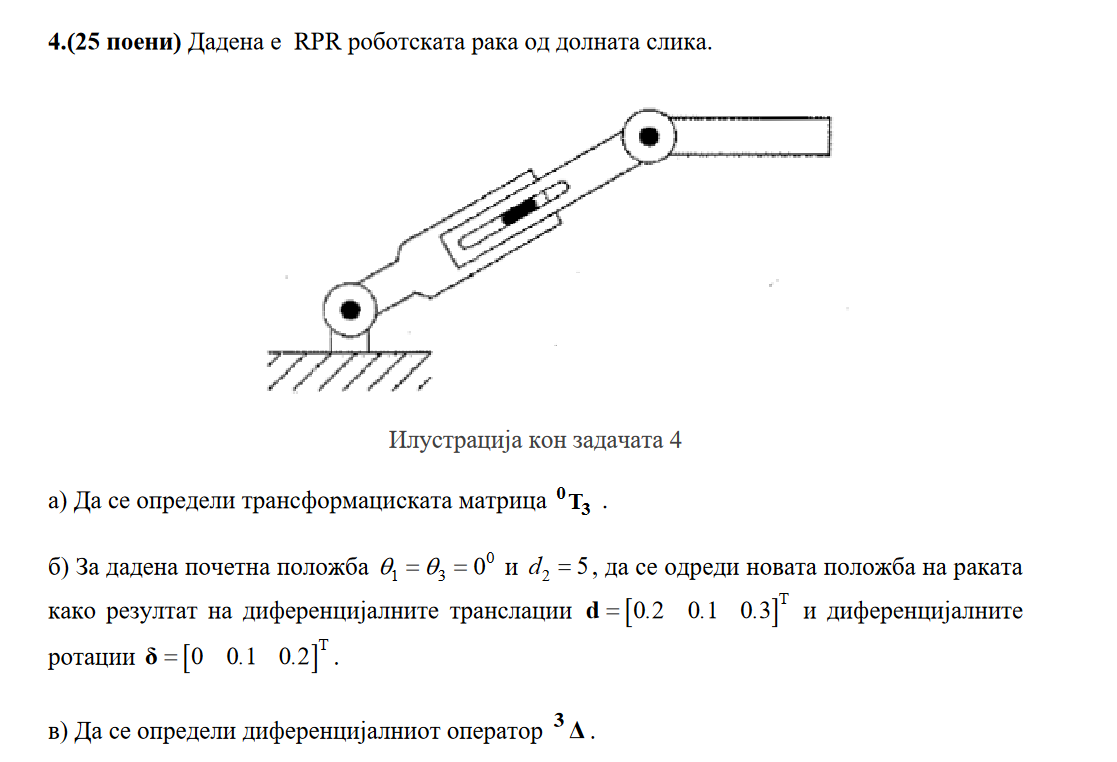

In [34]:
display.Image('images/dif.png', width=700)

In [37]:
theta1, d2, theta3 = sp.symbols('theta1, d2, theta3') 
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,0,sp.pi/2)
robot.add_prismatic_joint(0,d2,0,-sp.pi/2)
robot.add_revolute_joint(theta3,0,1,0)
robot.add_subs([(a, 1),(a3, 1)])
robot.interact()

In [38]:
T= robot.get_dh_matrix()
T

⎡cos(θ₁ + θ₃)  -sin(θ₁ + θ₃)  0  d₂⋅sin(θ₁) + cos(θ₁ + θ₃) ⎤
⎢                                                          ⎥
⎢sin(θ₁ + θ₃)  cos(θ₁ + θ₃)   0  -d₂⋅cos(θ₁) + sin(θ₁ + θ₃)⎥
⎢                                                          ⎥
⎢     0              0        1              0             ⎥
⎢                                                          ⎥
⎣     0              0        0              1             ⎦

In [39]:
T2= T.subs(theta1,0).subs(theta3,0).subs(d2,5)
T2

⎡1  0  0  1 ⎤
⎢           ⎥
⎢0  1  0  -5⎥
⎢           ⎥
⎢0  0  1  0 ⎥
⎢           ⎥
⎣0  0  0  1 ⎦

In [40]:
delta = rt.hdelta3(dRy=0.1, dRz=0.2, dx=0.2, dy=0.1, dz=0.3)
delta

⎡ 0    -0.2  0.1  0.2⎤
⎢                    ⎥
⎢0.2    0     0   0.1⎥
⎢                    ⎥
⎢-0.1   0     0   0.3⎥
⎢                    ⎥
⎣ 0     0     0    0 ⎦

In [41]:
T2new= T2+ delta*T2
T2new

⎡ 1    -0.2  0.1  2.2 ⎤
⎢                     ⎥
⎢0.2    1     0   -4.7⎥
⎢                     ⎥
⎢-0.1   0     1   0.2 ⎥
⎢                     ⎥
⎣ 0     0     0    1  ⎦

# 2023

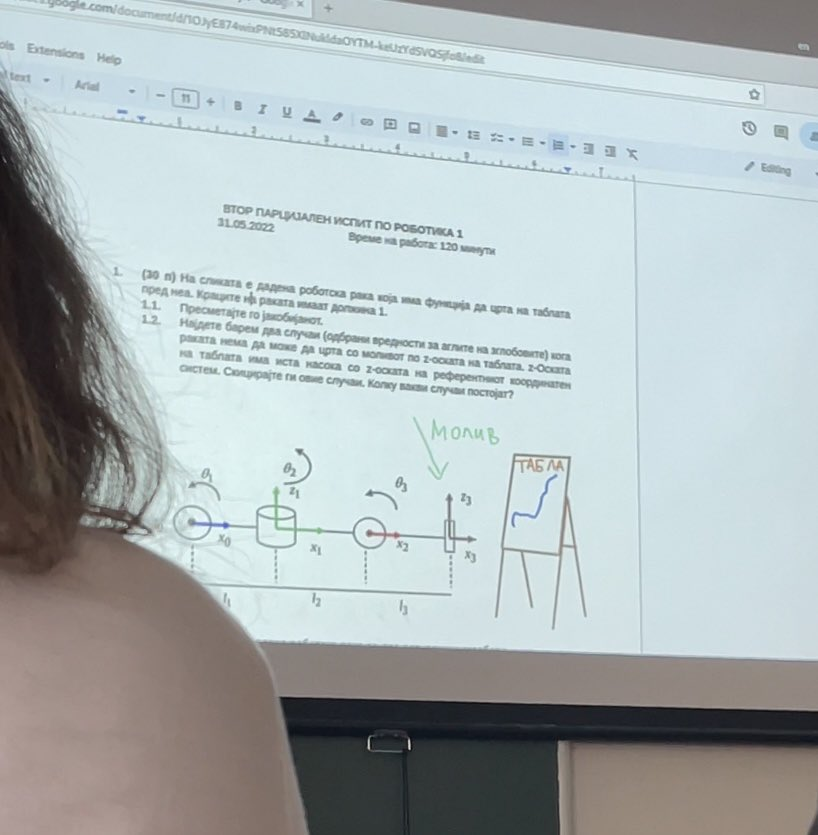

In [44]:
display.Image('images/2023.1.jpg', width=700)

In [45]:
theta1, theta2, theta3, l1, l2, l3 = sp.symbols('theta1, theta2, theta3, l1, l2, l3') 
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,l1,-sp.pi/2)
robot.add_revolute_joint(theta2,0,l2,sp.pi/2)
robot.add_revolute_joint(theta3,0,l3,-sp.pi/2)
robot.add_subs([(l1, 1),(l2, 1),(l3,1)])
robot.interact()

In [46]:
J= robot.jacobian()
J

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁)⋅cos(θ₂) - l₃⋅sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) - l₃⋅sin(θ₃)⋅co
⎢                                                                             
⎢l₁⋅cos(θ₁) + l₂⋅cos(θ₁)⋅cos(θ₂) - l₃⋅sin(θ₁)⋅sin(θ₃) + l₃⋅cos(θ₁)⋅cos(θ₂)⋅cos
⎢                                                                             
⎢                                        0                                    
⎢                                                                             
⎢                                        0                                    
⎢                                                                             
⎢                                        0                                    
⎢                                                                             
⎣                                        1                                    

s(θ₁)  -(l₂ + l₃⋅cos(θ₃))⋅sin(θ₂)⋅cos(θ₁)  -l₃⋅(sin(θ₁)⋅cos(θ₃) + sin(θ₃)⋅cos(
                                                   

In [47]:
Jv = robot.linear_jacobian()
Jv

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁)⋅cos(θ₂) - l₃⋅sin(θ₁)⋅cos(θ₂)⋅cos(θ₃) - l₃⋅sin(θ₃)⋅co
⎢                                                                             
⎢l₁⋅cos(θ₁) + l₂⋅cos(θ₁)⋅cos(θ₂) - l₃⋅sin(θ₁)⋅sin(θ₃) + l₃⋅cos(θ₁)⋅cos(θ₂)⋅cos
⎢                                                                             
⎣                                        0                                    

s(θ₁)  -(l₂ + l₃⋅cos(θ₃))⋅sin(θ₂)⋅cos(θ₁)  -l₃⋅(sin(θ₁)⋅cos(θ₃) + sin(θ₃)⋅cos(
                                                                              
(θ₃)   -(l₂ + l₃⋅cos(θ₃))⋅sin(θ₁)⋅sin(θ₂)  l₃⋅(-sin(θ₁)⋅sin(θ₃)⋅cos(θ₂) + cos(
                                                                              
           -(l₂ + l₃⋅cos(θ₃))⋅cos(θ₂)                    l₃⋅sin(θ₂)⋅sin(θ₃)   

θ₁)⋅cos(θ₂))⎤
            ⎥
θ₁)⋅cos(θ₃))⎥
            ⎥
            ⎦

In [48]:
det = sp.det(Jv).simplify()
det

   ⎛                          2                                ⎞        
l₃⋅⎝l₁⋅l₂ + l₁⋅l₃⋅cos(θ₃) + l₂ ⋅cos(θ₂) + l₂⋅l₃⋅cos(θ₂)⋅cos(θ₃)⎠⋅sin(θ₃)

In [49]:
# barame singulariteti koga theta 3 e vo prashanje
interval = sp.Interval(-sp.pi, sp.pi, left_open=True)
solution = sp.solveset(det, theta3, interval)
solution #singulariteti

         ⎧   │          ⎛                          2                          
{0, π} ∪ ⎨θ₃ │ θ₃ ∊ ℝ ∧ ⎝l₁⋅l₂ + l₁⋅l₃⋅cos(θ₃) + l₂ ⋅cos(θ₂) + l₂⋅l₃⋅cos(θ₂)⋅c
         ⎩   │                                                                

          ⎞⎫
os(θ₃) = 0⎠⎬
           ⎭

* кога тета3=0, раката ќе биде целосно испружена со што локалната z3 оска никогаш нема да може да ја допре таблата
* кога тета3=пи, извршниот елемент ќе се поклопи со вториот зглоб, со што губиме еден степен на слобода, и повторно никогаш нема да може да достигне до таблата

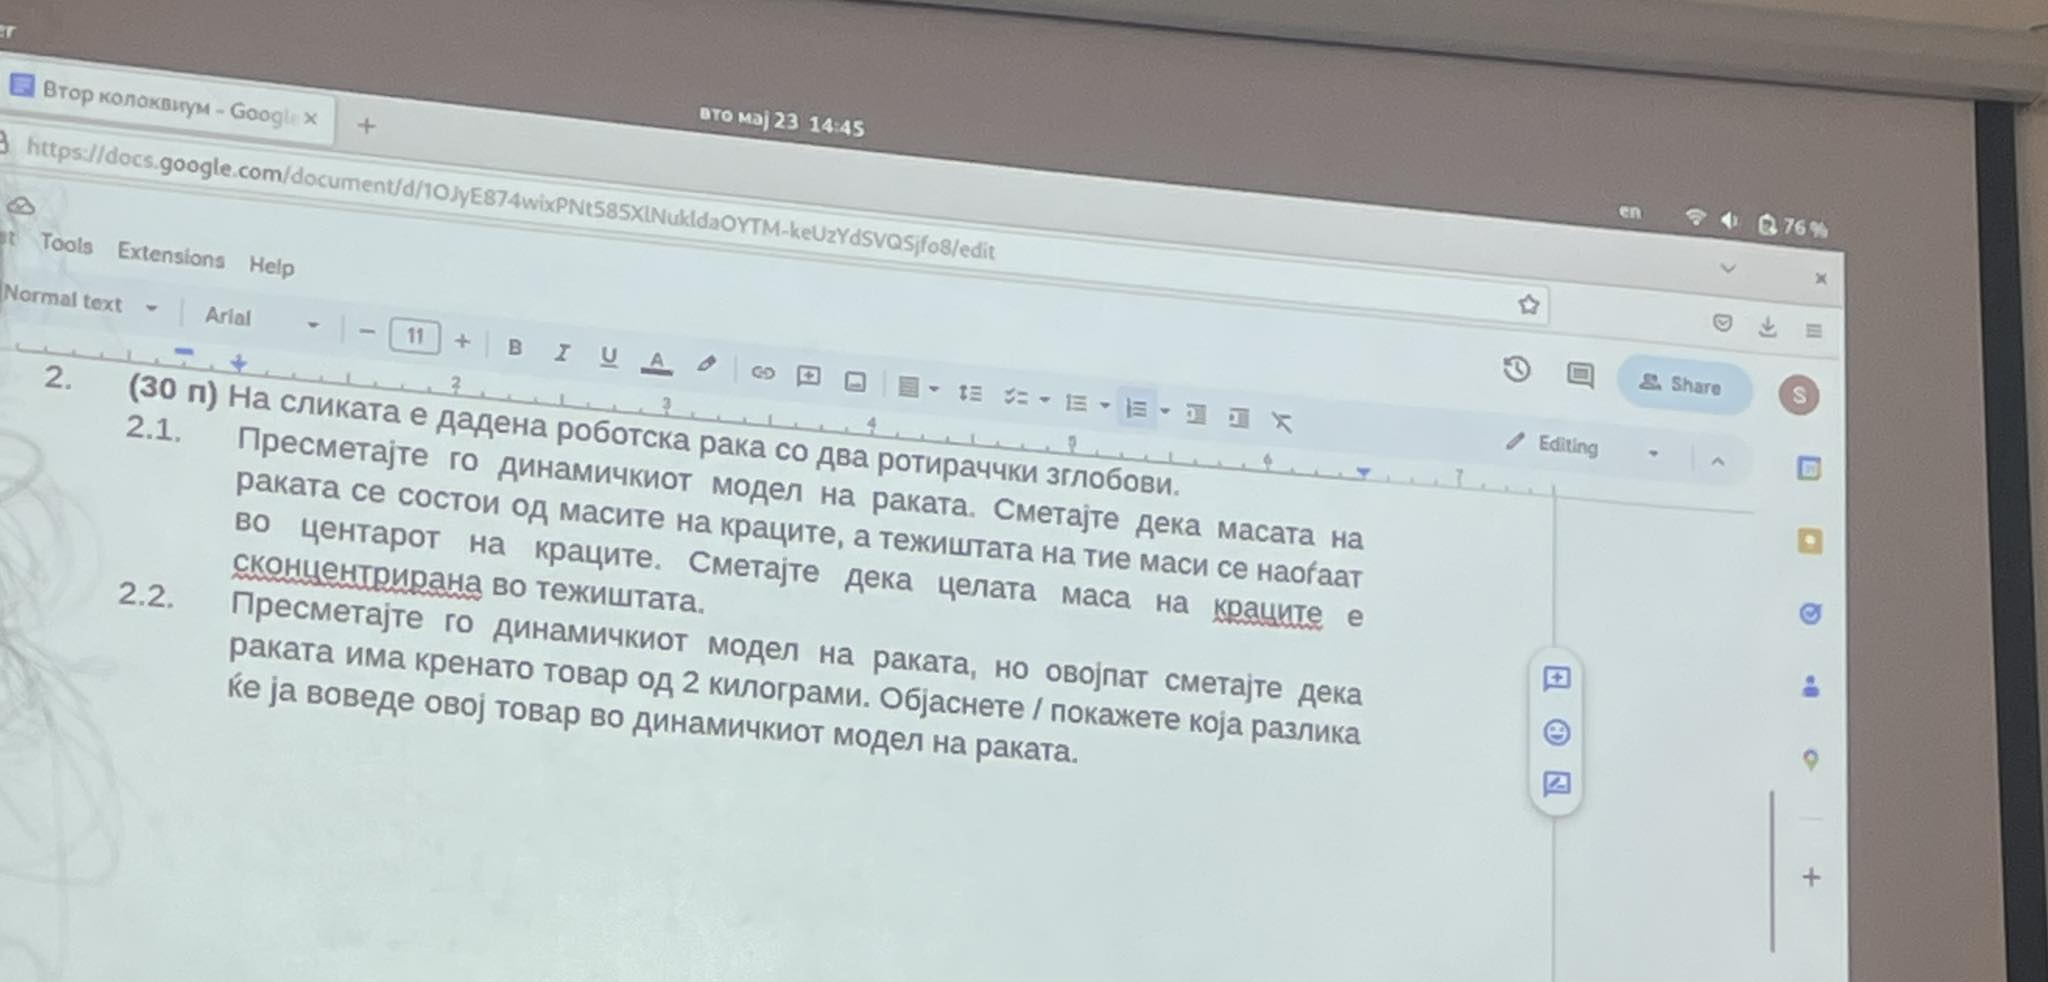

In [50]:
display.Image('images/2023.2.jpg', width=700)

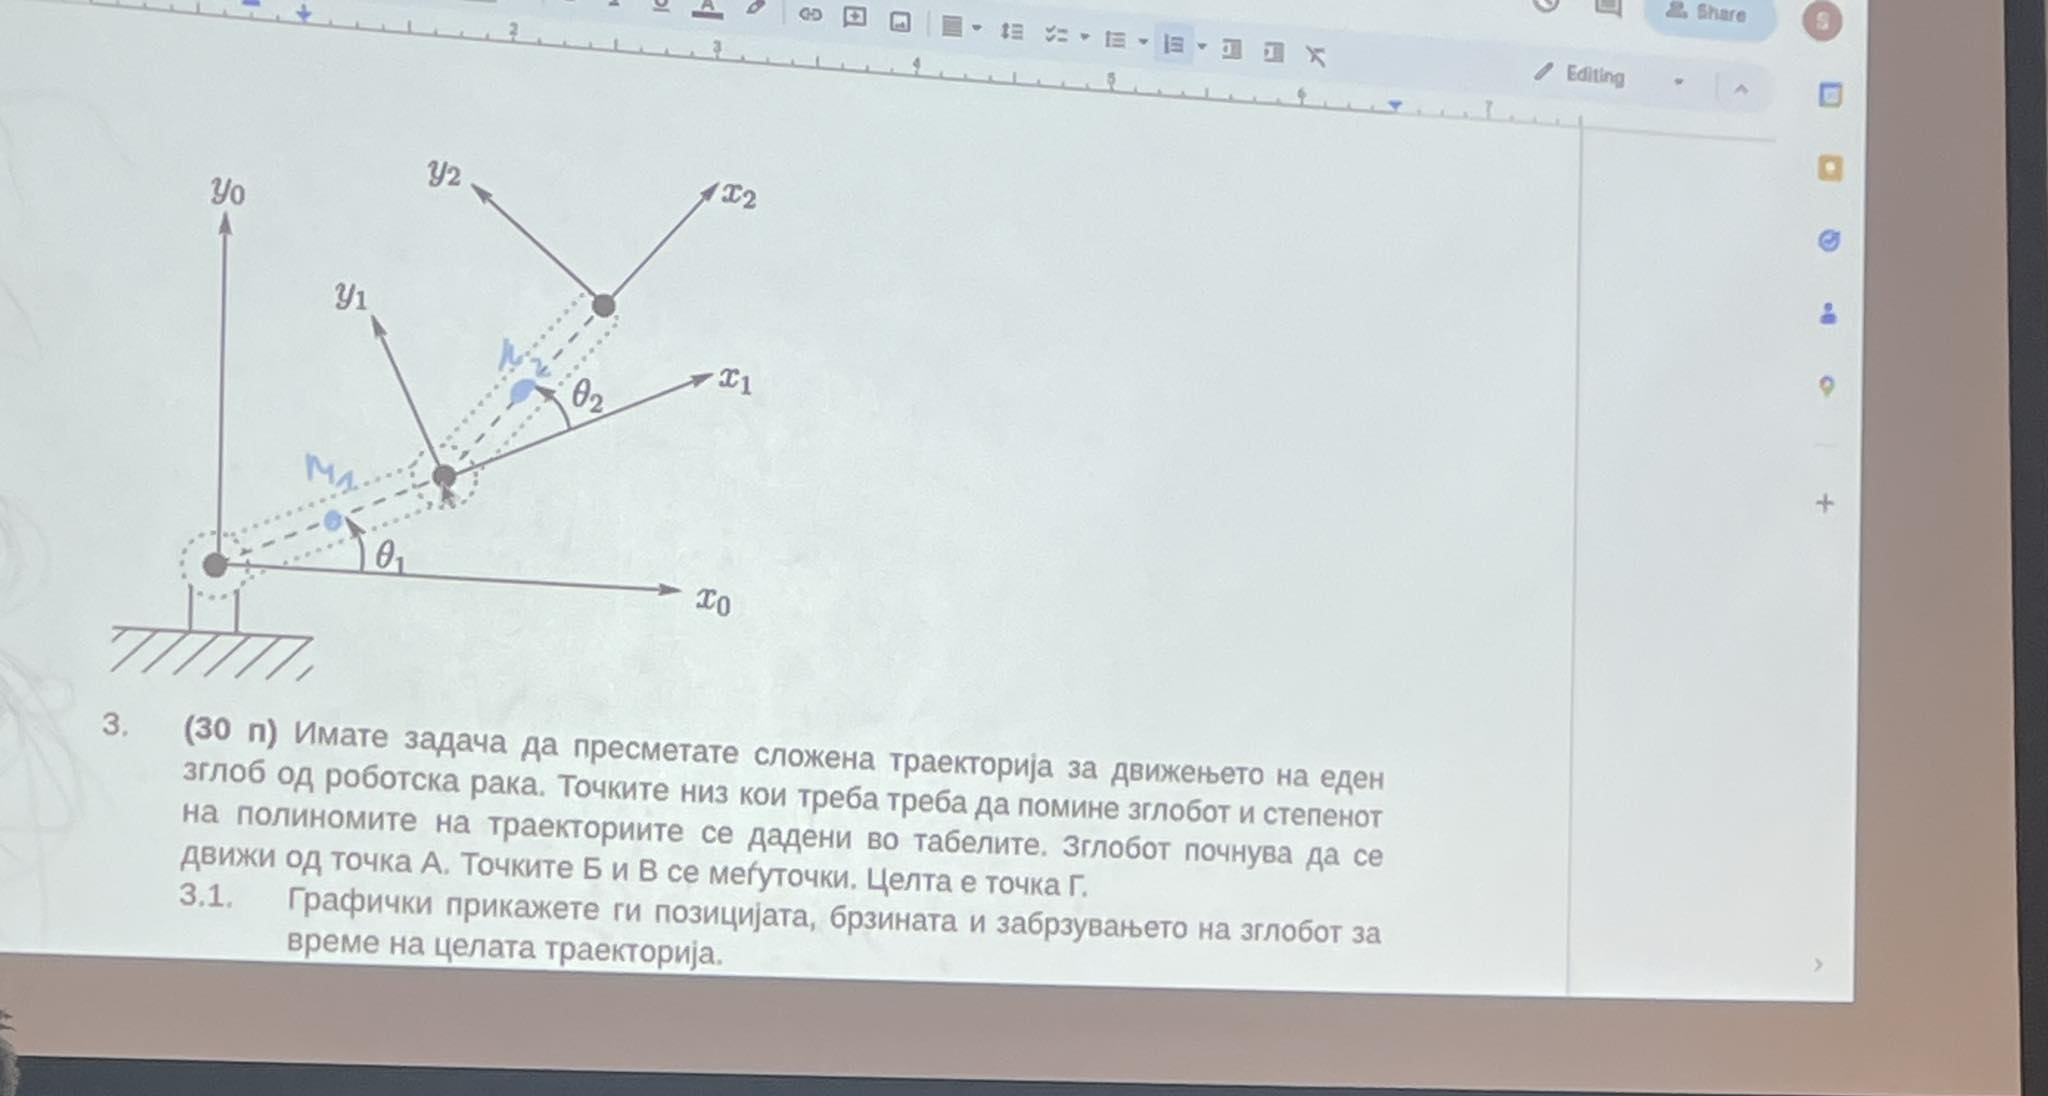

In [53]:
display.Image('images/2023.5.jpg', width=700)

In [54]:
#a)
m1, m2, g, l1, l2  = sp.symbols('m1, m2, g, l1, l2')
theta1, theta2= mechanics.dynamicsymbols('theta1, theta2')

In [57]:
x1= (l1/2)*sp.cos(theta1)
y1= (l1/2)*sp.sin(theta1)
v12=x1.diff(t)**2+y1.diff(t)**2
v12= v12.simplify()
v12

  2   2
l₁ ⋅θ₁̇ 
───────
   4   

In [58]:
x2= (l1)*sp.cos(theta1)+(l2/2)*sp.cos(theta1+theta2)
y2= (l1)*sp.sin(theta1)+(l2/2)*sp.sin(theta1+theta2)
v22=x2.diff(t)**2+y2.diff(t)**2
v22= v22.simplify()
v22

                                                      2   2     2           2 
  2   2                   2                         l₂ ⋅θ₁̇    l₂ ⋅θ₁̇⋅θ₂̇   l
l₁ ⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + ─────── + ───────── + 
                                                       4          2          4

  2
₂ ⋅θ₂̇ 
───────
   

In [59]:
K=m1*v12/2+m2*v22/2
K

                ⎛                                                      2   2  
                ⎜  2   2                   2                         l₂ ⋅θ₁̇  
  2      2   m₂⋅⎜l₁ ⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + ─────
l₁ ⋅m₁⋅θ₁̇       ⎝                                                       4    
────────── + ─────────────────────────────────────────────────────────────────
    8                                                  2                      

   2           2   2⎞
  l₂ ⋅θ₁̇⋅θ₂̇   l₂ ⋅θ₂̇ ⎟
── + ───────── + ───────⎟
      2          4   ⎠
─────────────────────
                     

In [60]:
P=m1*g*(l1/2)*sp.sin(theta1)+m2*g*l1*sp.sin(theta1)+m2*g*(l2/2)*sp.sin(theta1+theta2)
P

g⋅l₁⋅m₁⋅sin(θ₁)                     g⋅l₂⋅m₂⋅sin(θ₁ + θ₂)
─────────────── + g⋅l₁⋅m₂⋅sin(θ₁) + ────────────────────
       2                                     2          

In [61]:
L=K-P
L

                                                                             ⎛
                                                                             ⎜
                                                               2      2   m₂⋅⎜
  g⋅l₁⋅m₁⋅sin(θ₁)                     g⋅l₂⋅m₂⋅sin(θ₁ + θ₂)   l₁ ⋅m₁⋅θ₁̇       
- ─────────────── - g⋅l₁⋅m₂⋅sin(θ₁) - ──────────────────── + ────────── + ────
         2                                     2                 8            

                                                      2   2     2           2 
  2   2                   2                         l₂ ⋅θ₁̇    l₂ ⋅θ₁̇⋅θ₂̇   l
l₁ ⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + ─────── + ───────── + 
⎝                                                       4          2          
──────────────────────────────────────────────────────────────────────────────
                                      2                                       

  2⎞
₂ ⋅θ₂̇ ⎟
───────⎟
4   ⎠
────
    

In [62]:
rt.lagrangian(L,[theta1, theta2])

⎡                                                             2            ⎛  
⎢g⋅l₁⋅m₁⋅cos(θ₁)                     g⋅l₂⋅m₂⋅cos(θ₁ + θ₂)   l₁ ⋅m₁⋅θ₁̈   m₂⋅⎝4
⎢─────────────── + g⋅l₁⋅m₂⋅cos(θ₁) + ──────────────────── + ───────── + ──────
⎢       2                                     2                 4             
⎢                                                                             
⎢                                                              ⎛              
⎢                                                        l₂⋅m₂⋅⎝2⋅g⋅cos(θ₁ + θ
⎢                                                        ─────────────────────
⎣                                                                             

  2                                                2                          
⋅l₁ ⋅θ₁̈ - 4⋅l₁⋅l₂⋅sin(θ₂)⋅θ₁̇⋅θ₂̇ - 2⋅l₁⋅l₂⋅sin(θ₂)⋅θ₂̇  + 4⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁
──────────────────────────────────────────────────────────────────────────────
                                                   

In [65]:
m1, m2, g, l1, l2, m3  = sp.symbols('m1, m2, g, l1, l2, m3')
theta1, theta2= mechanics.dynamicsymbols('theta1, theta2')

In [70]:
#b)
x3= (l1)*sp.cos(theta1)+(l2)*sp.cos(theta1+theta2)
y3= (l1)*sp.sin(theta1)+(l2)*sp.cos(theta1+theta2)
v32=x3.diff(t)**2+y3.diff(t)**2
v32= v32.simplify()
v32

                                           2                                  
(l₁⋅sin(θ₁)⋅θ₁̇ + l₂⋅(θ₁̇ + θ₂̇)⋅sin(θ₁ + θ₂))  + (l₁⋅cos(θ₁)⋅θ₁̇ - l₂⋅(θ₁̇ + 

            2
θ₂̇)⋅sin(θ₁ + θ₂)) 

In [71]:
K=K+m3*v32/2
K

                ⎛                                                      2   2  
                ⎜  2   2                   2                         l₂ ⋅θ₁̇  
  2      2   m₂⋅⎜l₁ ⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + ─────
l₁ ⋅m₁⋅θ₁̇       ⎝                                                       4    
────────── + ─────────────────────────────────────────────────────────────────
    8                                                  2                      

   2           2   2⎞                                                         
  l₂ ⋅θ₁̇⋅θ₂̇   l₂ ⋅θ₂̇ ⎟                                                     
── + ───────── + ───────⎟      ⎛                                           2  
      2          4   ⎠   m₃⋅⎝(l₁⋅sin(θ₁)⋅θ₁̇ + l₂⋅(θ₁̇ + θ₂̇)⋅sin(θ₁ + θ₂))  +
───────────────────── + ──────────────────────────────────────────────────────
                                                                       2      

                                                ⎛ 

In [72]:
P3=m3*g*l1*sp.sin(theta1)+m3*g*(l2)*sp.sin(theta1+theta2)
P=P+P3
P

g⋅l₁⋅m₁⋅sin(θ₁)                                         g⋅l₂⋅m₂⋅sin(θ₁ + θ₂)  
─────────────── + g⋅l₁⋅m₂⋅sin(θ₁) + 2⋅g⋅l₁⋅m₃⋅sin(θ₁) + ──────────────────── +
       2                                                         2            

                       
 2⋅g⋅l₂⋅m₃⋅sin(θ₁ + θ₂)
                       

In [73]:
L=K-P
L

                                                                              
                                                                              
                                                                              
  g⋅l₁⋅m₁⋅sin(θ₁)                                         g⋅l₂⋅m₂⋅sin(θ₁ + θ₂)
- ─────────────── - g⋅l₁⋅m₂⋅sin(θ₁) - 2⋅g⋅l₁⋅m₃⋅sin(θ₁) - ────────────────────
         2                                                         2          

                                            ⎛                                 
                                            ⎜  2   2                   2      
                              2      2   m₂⋅⎜l₁ ⋅θ₁̇  + l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + l
                            l₁ ⋅m₁⋅θ₁̇       ⎝                                
 - 2⋅g⋅l₂⋅m₃⋅sin(θ₁ + θ₂) + ────────── + ─────────────────────────────────────
                                8                                             

                     2   2     2           2   2⎞ 

In [74]:
rt.lagrangian(L,[theta1, theta2])

⎡                                                                             
⎢g⋅l₁⋅m₁⋅cos(θ₁)                                         g⋅l₂⋅m₂⋅cos(θ₁ + θ₂) 
⎢─────────────── + g⋅l₁⋅m₂⋅cos(θ₁) + 2⋅g⋅l₁⋅m₃⋅cos(θ₁) + ──────────────────── 
⎢       2                                                         2           
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                             2                                                
                           l₁ ⋅m₁⋅θ₁̈     2             2       2             
+ 2⋅g⋅l₂⋅m₃⋅cos(θ₁ + θ₂) + ───────── + l₁ ⋅m₂⋅θ₁̈ + 2⋅l₁ ⋅m₃⋅sin (θ₁)⋅θ₁̈ + 2⋅
                               4                   

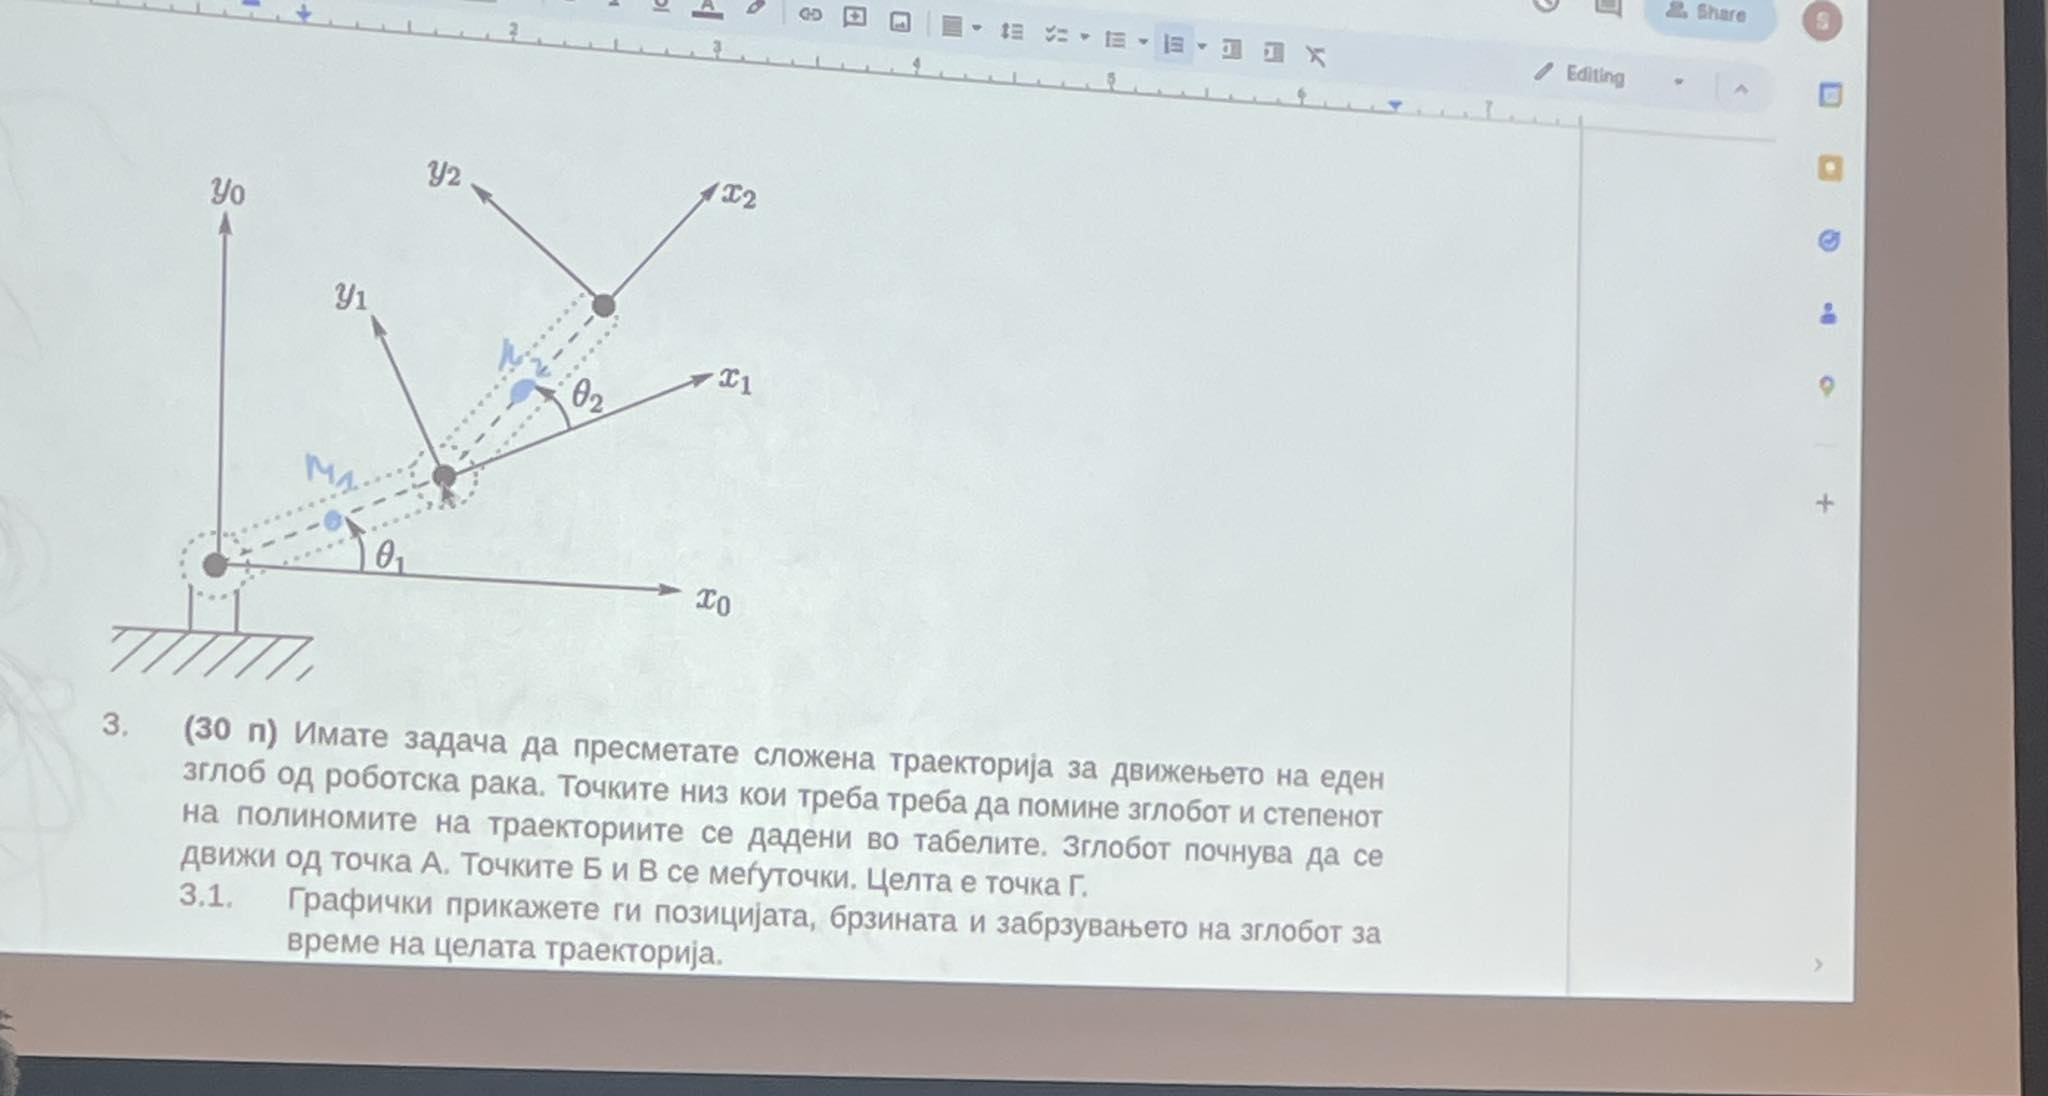

In [75]:
display.Image('images/2023.5.jpg', width=700)

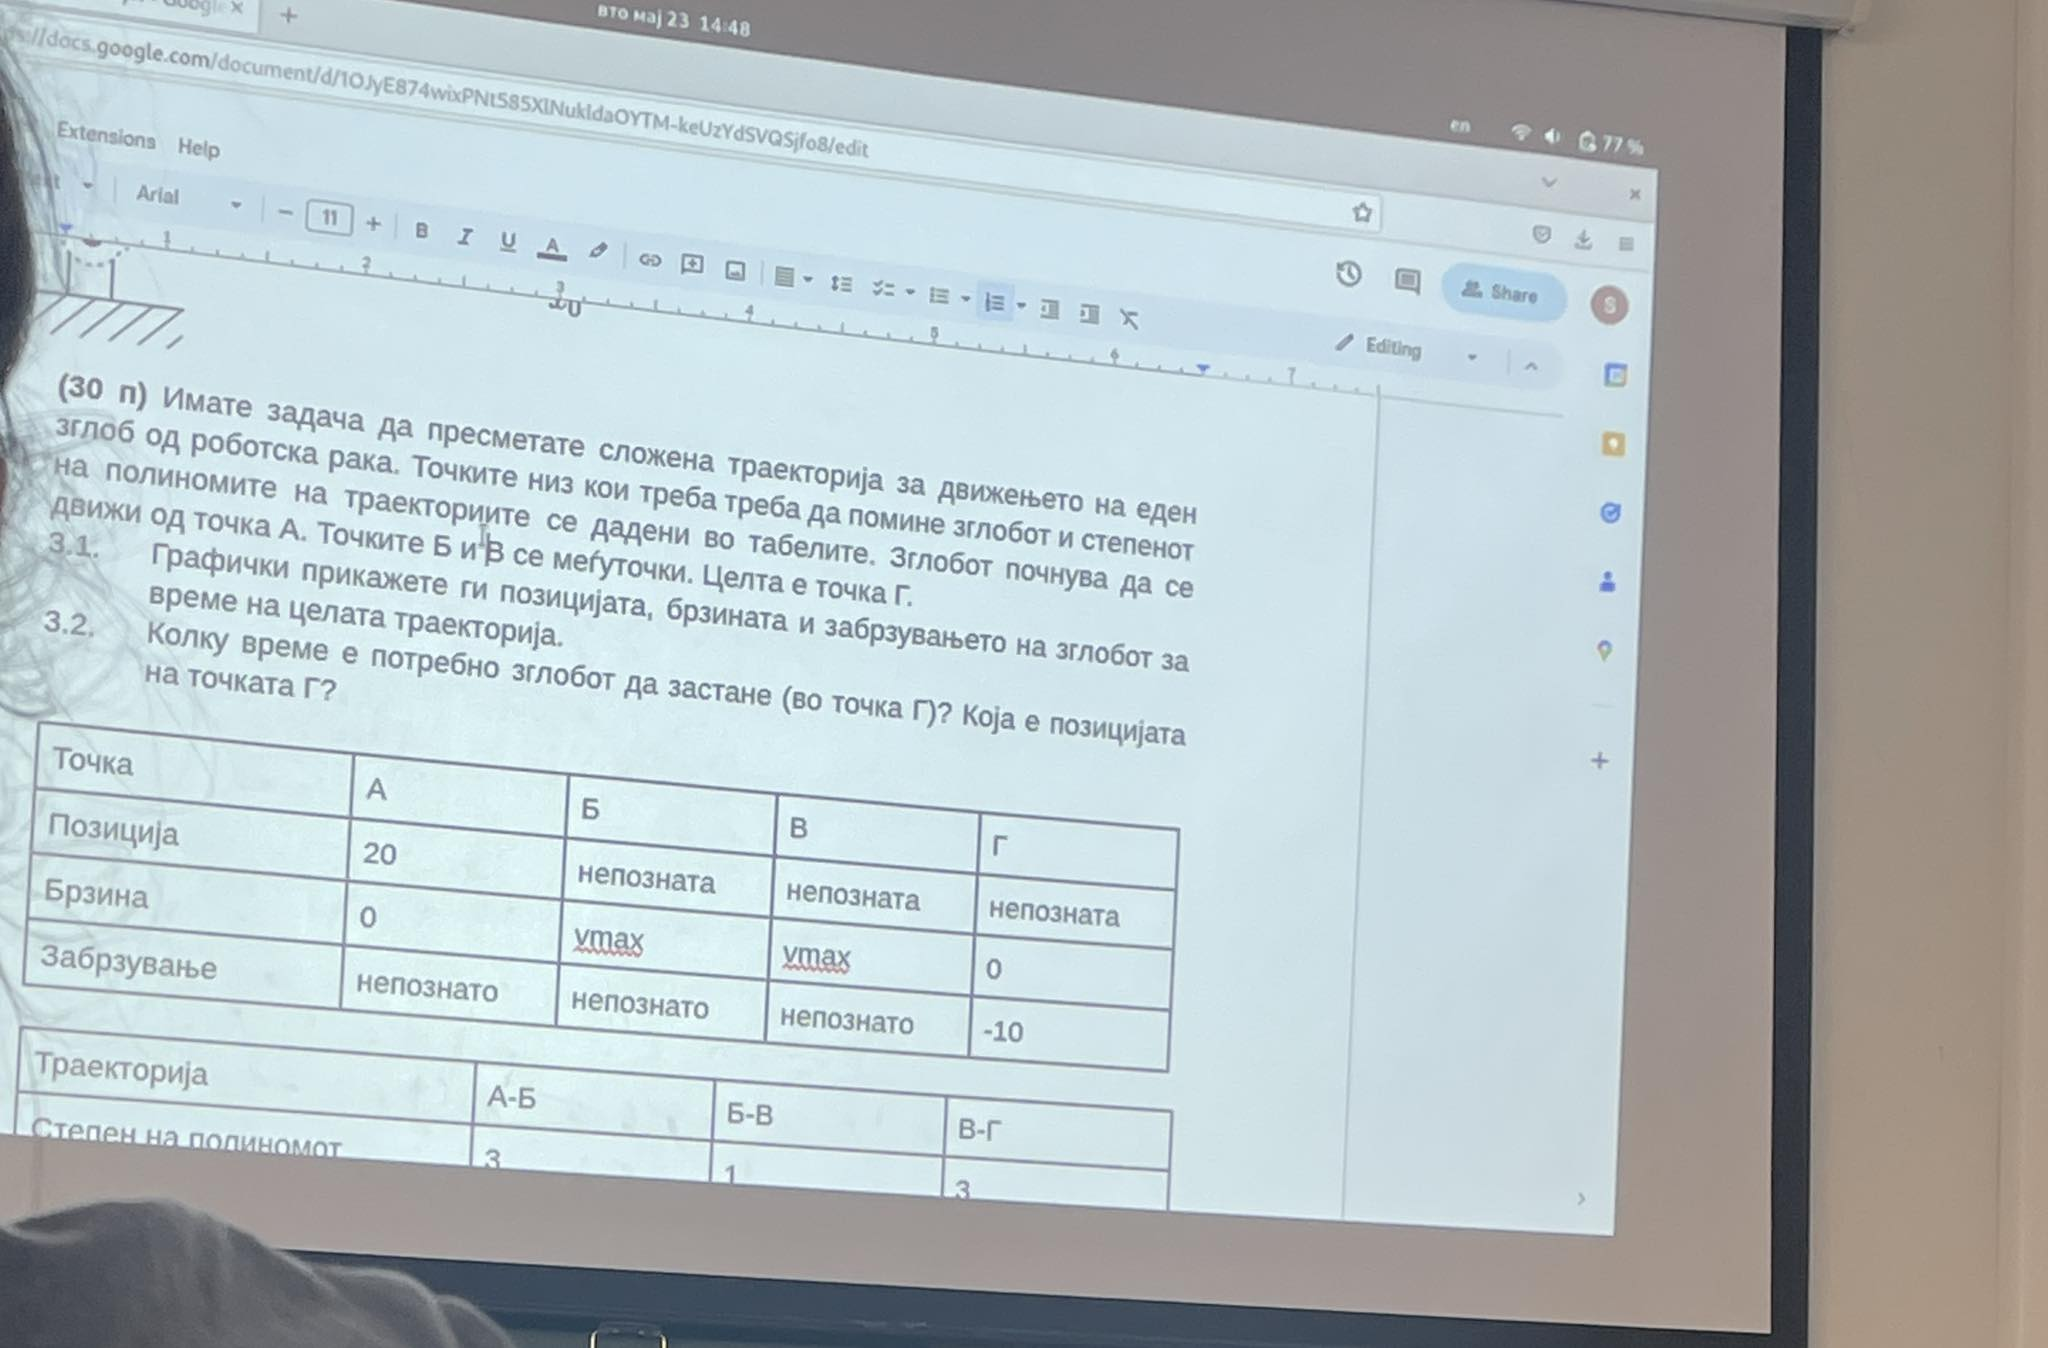

In [76]:
display.Image('images/2023.4.jpg', width=700)

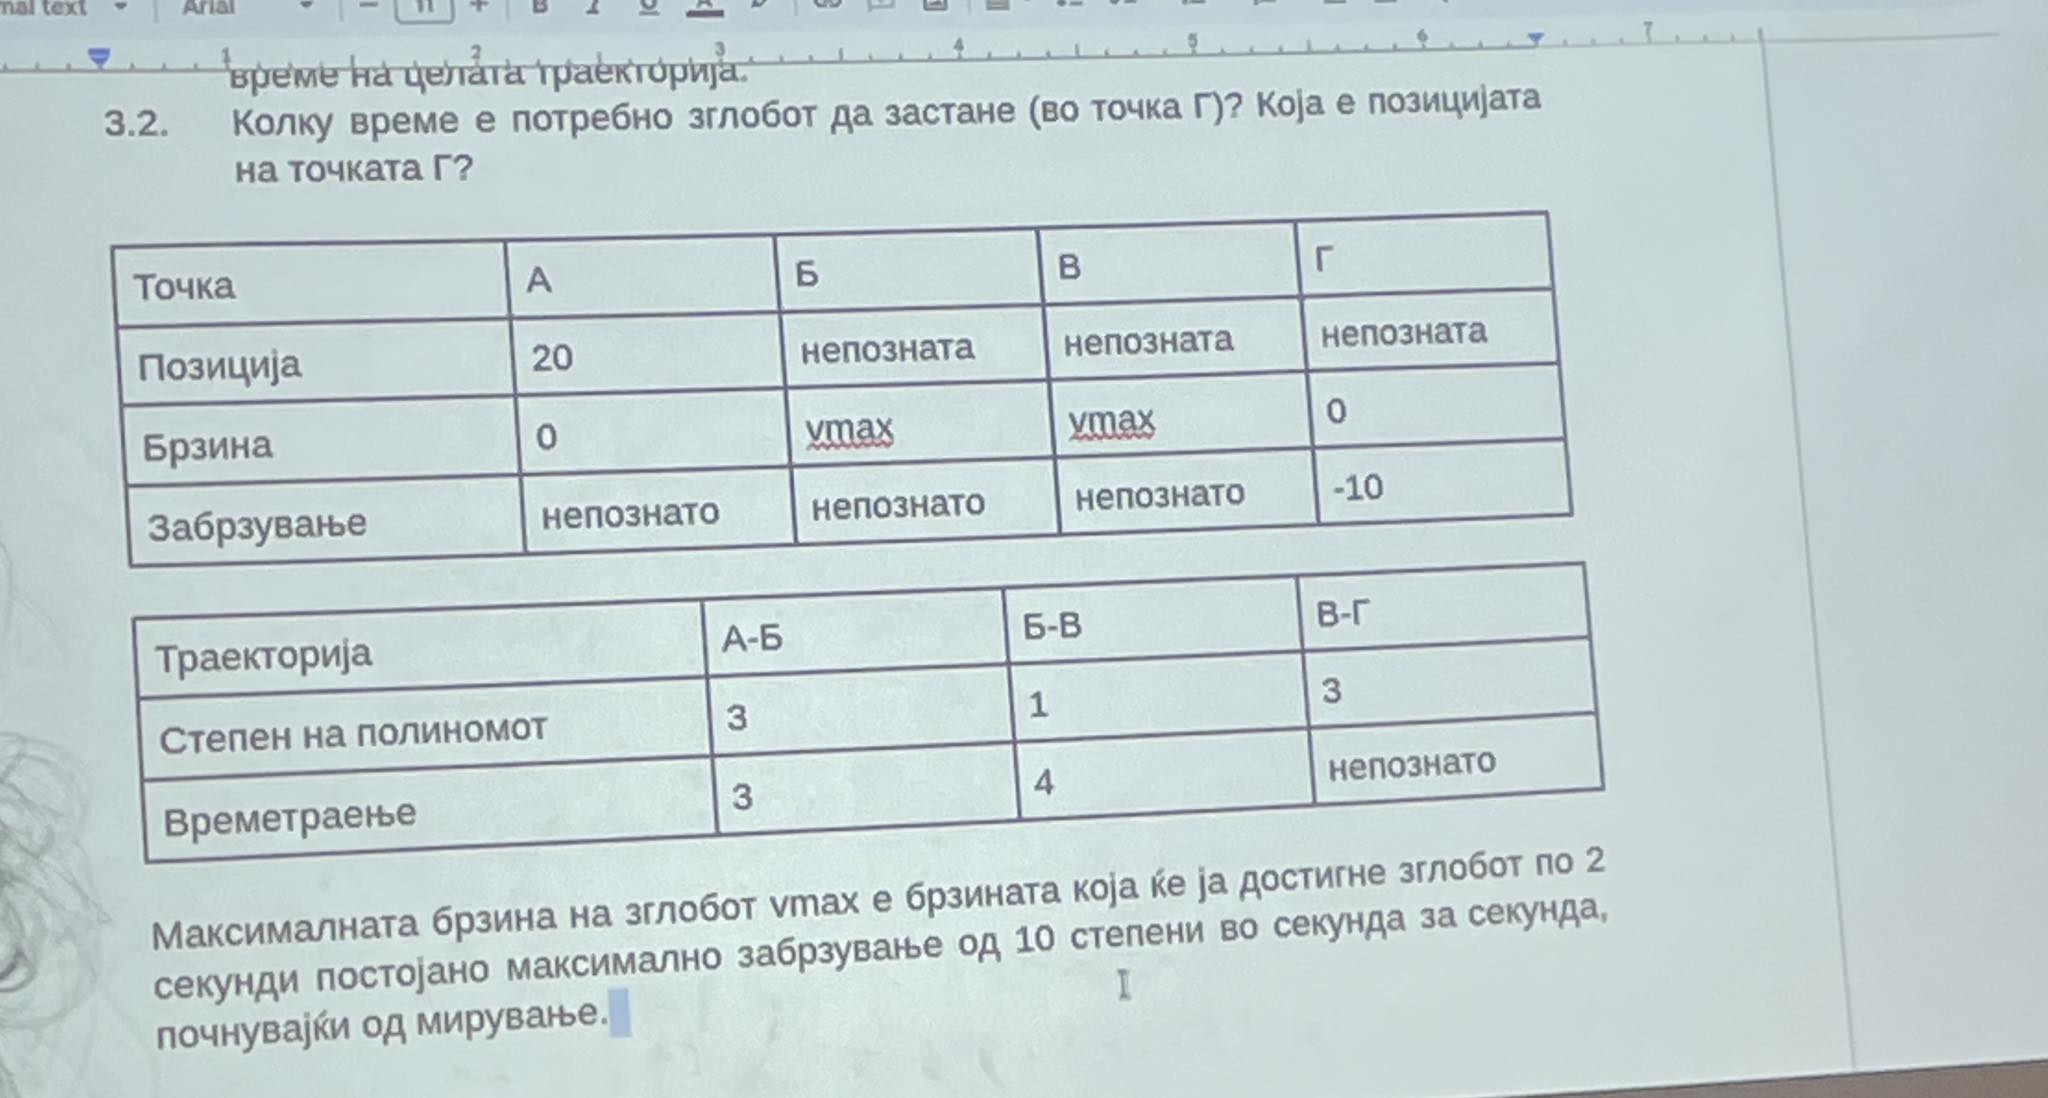

In [77]:
display.Image('images/2023.3.jpg', width=700)

In [63]:
theta1, symbols1 = rt.polynomial(3, char='a')
v_theta1 = theta1.diff(t)
a_theta1 = theta1.diff(t, 2)

theta2, symbols2 = rt.polynomial(1, char='b')
v_theta2 = theta2.diff(t)
a_theta2 = theta2.diff(t, 2)

theta3, symbols3 = rt.polynomial(3, char='c')
v_theta3 = theta3.diff(t)
a_theta3 = theta3.diff(t, 2)

theta1, theta2, theta3

⎛                2       3                             2       3⎞
⎝a₀ + a₁⋅t + a₂⋅t  + a₃⋅t , b₀ + b₁⋅t, c₀ + c₁⋅t + c₂⋅t  + c₃⋅t ⎠

In [64]:
ti, tf = 0, 3
eq1_xi = theta1.subs(t, ti) - 20
eq1_xf = theta1.subs(t, tf) - 55
eq1_vi = v_theta1.subs(t, ti) - 0
eq1_vf = v_theta1.subs(t, tf) - 20
#eq1_ai = a_theta1.subs(t, ti) - 10
#eq1_af = a_theta1.subs(t, tf) - 0

ti, tf = 3, 7
eq2_xi = theta2.subs(t, ti) - 55
#eq2_xf = theta1.subs(t, tf) - 135
eq2_vi = v_theta2.subs(t, ti) - 20
#eq2_vf = v_theta2.subs(t, tf) - 20
# eq2_ai = a_theta2.subs(t, ti) - 0
# eq2_af = a_theta2.subs(t, tf) - 0

ti = 7
tf=sp.symbols('t_f')
eq3_xi = theta3.subs(t, ti) - 135 # proizleguva od const brzina i pat od 4s => s=v*t=20*4
# eq2_xf = theta1.subs(t, tf) - 20
eq3_vi = v_theta3.subs(t, ti) - 20
eq3_vf = v_theta3.subs(t, tf) - 0
# eq3_ai = a_theta3.subs(t, ti) - 0
eq3_af = a_theta3.subs(t, tf) - (-10)

In [65]:
symbols = [*symbols1, *symbols2, *symbols3]
equations = [
    eq1_xi, eq1_xf, eq1_vi, eq1_vf,
    eq2_xi,  eq2_vi, 
    eq3_xi, eq3_vi, eq3_vf, eq3_af]
solution = sp.linsolve(equations, symbols)
solution

⎧⎛                               2                             2              
⎪⎜          -10           720⋅t_f  - 9590⋅t_f + 24990  - 50⋅t_f  + 490⋅t_f  5⋅
⎨⎜20, 0, 5, ────, -5, 20, ───────────────────────────, ───────────────────, ──
⎪⎜           27                   2                        2                  
⎩⎝                           3⋅t_f  - 42⋅t_f + 147      t_f  - 14⋅t_f + 49    

   2                                      ⎞⎫
t_f  - 20⋅t_f - 245       90 - 10⋅t_f     ⎟⎪
───────────────────, ─────────────────────⎟⎬
   2                      2               ⎟⎪
t_f  - 14⋅t_f + 49   3⋅t_f  - 42⋅t_f + 147⎠⎭

In [66]:
solution_subbed = solution.args[0]
solution_subbed

⎛                               2                             2               
⎜          -10           720⋅t_f  - 9590⋅t_f + 24990  - 50⋅t_f  + 490⋅t_f  5⋅t
⎜20, 0, 5, ────, -5, 20, ───────────────────────────, ───────────────────, ───
⎜           27                   2                        2                   
⎝                           3⋅t_f  - 42⋅t_f + 147      t_f  - 14⋅t_f + 49    t

  2                                      ⎞
_f  - 20⋅t_f - 245       90 - 10⋅t_f     ⎟
──────────────────, ─────────────────────⎟
  2                      2               ⎟
_f  - 14⋅t_f + 49   3⋅t_f  - 42⋅t_f + 147⎠

In [75]:
theta1_subbed = theta1
theta2_subbed = theta2
theta3_subbed = theta3

for sub in zip(symbols, solution_subbed):
    theta1_subbed = theta1_subbed.subs(*sub)
    theta2_subbed = theta2_subbed.subs(*sub)
    theta3_subbed = theta3_subbed.subs(*sub)
theta1_subbed, theta2_subbed, theta3_subbed

⎛      3                            3                    2 ⎛     2            
⎜  10⋅t       2                    t ⋅(90 - 10⋅t_f)     t ⋅⎝5⋅t_f  - 20⋅t_f - 
⎜- ───── + 5⋅t  + 20, 20⋅t - 5, ───────────────────── + ──────────────────────
⎜    27                              2                         2              
⎝                               3⋅t_f  - 42⋅t_f + 147       t_f  - 14⋅t_f + 49

   ⎞     ⎛        2          ⎞          2                   ⎞
245⎠   t⋅⎝- 50⋅t_f  + 490⋅t_f⎠   720⋅t_f  - 9590⋅t_f + 24990⎟
──── + ─────────────────────── + ───────────────────────────⎟
             2                           2                  ⎟
          t_f  - 14⋅t_f + 49        3⋅t_f  - 42⋅t_f + 147   ⎠

In [76]:
a3i= theta3_subbed.diff(t,2)
a3i

    ⎛                   2             ⎞ 
-10⋅⎝2⋅t⋅(t_f - 9) - t_f  + 4⋅t_f + 49⎠ 
────────────────────────────────────────
              2                         
           t_f  - 14⋅t_f + 49           

In [77]:
a3i= a3i.subs(t,7)
a3i

    ⎛     2              ⎞ 
-10⋅⎝- t_f  + 18⋅t_f - 77⎠ 
───────────────────────────
        2                  
     t_f  - 14⋅t_f + 49    

In [78]:
from sympy.solvers import solve
solve(a3i,tf) 

[11]

* za tf dobivame deka e 11 sekundi

In [79]:
ti, tf = 0, 3
eq1_xi = theta1.subs(t, ti) - 20
eq1_xf = theta1.subs(t, tf) - 55
eq1_vi = v_theta1.subs(t, ti) - 0
eq1_vf = v_theta1.subs(t, tf) - 20
#eq1_ai = a_theta1.subs(t, ti) - 10
#eq1_af = a_theta1.subs(t, tf) - 0

ti, tf = 3, 7
eq2_xi = theta2.subs(t, ti) - 55
#eq2_xf = theta1.subs(t, tf) - 135
eq2_vi = v_theta2.subs(t, ti) - 20
#eq2_vf = v_theta2.subs(t, tf) - 20
# eq2_ai = a_theta2.subs(t, ti) - 0
# eq2_af = a_theta2.subs(t, tf) - 0

ti, tf = 7,9.8
eq3_xi = theta3.subs(t, ti) - 135 # proizleguva od const brzina i pat od 4s => s=v*t=20*4
# eq2_xf = theta1.subs(t, tf) - 20
eq3_vi = v_theta3.subs(t, ti) - 20
eq3_vf = v_theta3.subs(t, tf) - 0
# eq3_ai = a_theta3.subs(t, ti) - 0
eq3_af = a_theta3.subs(t, tf) - (-10)

In [80]:
symbols = [*symbols1, *symbols2, *symbols3]
equations = [
    eq1_xi, eq1_xf, eq1_vi, eq1_vf,
    eq2_xi,  eq2_vi, 
    eq3_xi, eq3_vi, eq3_vf, eq3_af]
solution = sp.linsolve(equations, symbols)
solution

{(20.0, 1.77635683940025e-15, 5.0, -0.37037037037037, -5.0, 20.0, 6.6666666666
6697, -9.9475983006414e-14, 5.00000000000001, -0.340136054421769)}

In [81]:
solution_subbed = solution.args[0]
solution_subbed

(20.0, 1.77635683940025e-15, 5.0, -0.37037037037037, -5.0, 20.0, 6.66666666666
697, -9.9475983006414e-14, 5.00000000000001, -0.340136054421769)

In [82]:
theta1_subbed = theta1
theta2_subbed = theta2
theta3_subbed = theta3

for sub in zip(symbols, solution_subbed):
    theta1_subbed = theta1_subbed.subs(*sub)
    theta2_subbed = theta2_subbed.subs(*sub)
    theta3_subbed = theta3_subbed.subs(*sub)
theta1_subbed, theta2_subbed, theta3_subbed

⎛                    3        2                                               
⎝- 0.37037037037037⋅t  + 5.0⋅t  + 1.77635683940025e-15⋅t + 20.0, 20.0⋅t - 5.0,

                      3                     2                                 
 - 0.340136054421769⋅t  + 5.00000000000001⋅t  - 9.9475983006414e-14⋅t + 6.6666

          ⎞
6666666697⎠

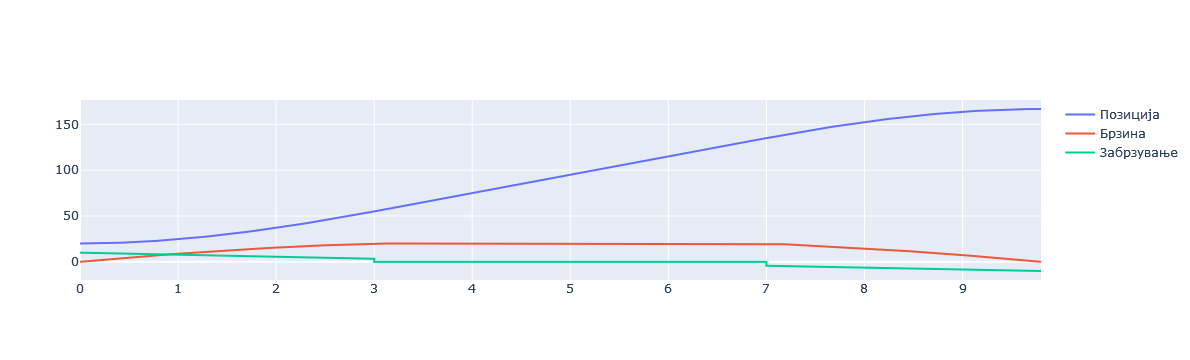

In [83]:
rt.plot_trajectories([(theta1_subbed, 0, 3), (theta2_subbed, 3, 7), (theta3_subbed, 7, 9.8)])

In [34]:
ti, tf = 0, 3
xf= sp.symbols('x_f')
theta1, solution = rt.trajectory_polynomial_3(ti, tf, xi=20, xf=xf, vi=0, vf=20)
theta1, solution

⎛ 3 ⎛100   2⋅x_f⎞    2 ⎛x_f   40⎞       ⎧⎛       x_f   40  100   2⋅x_f⎞⎫⎞
⎜t ⋅⎜─── - ─────⎟ + t ⋅⎜─── - ──⎟ + 20, ⎨⎜20, 0, ─── - ──, ─── - ─────⎟⎬⎟
⎝   ⎝ 27     27 ⎠      ⎝ 3    3 ⎠       ⎩⎝        3    3    27     27 ⎠⎭⎠

In [35]:
solutionn=solution.args[0]
solutionn

⎛       x_f   40  100   2⋅x_f⎞
⎜20, 0, ─── - ──, ─── - ─────⎟
⎝        3    3    27     27 ⎠

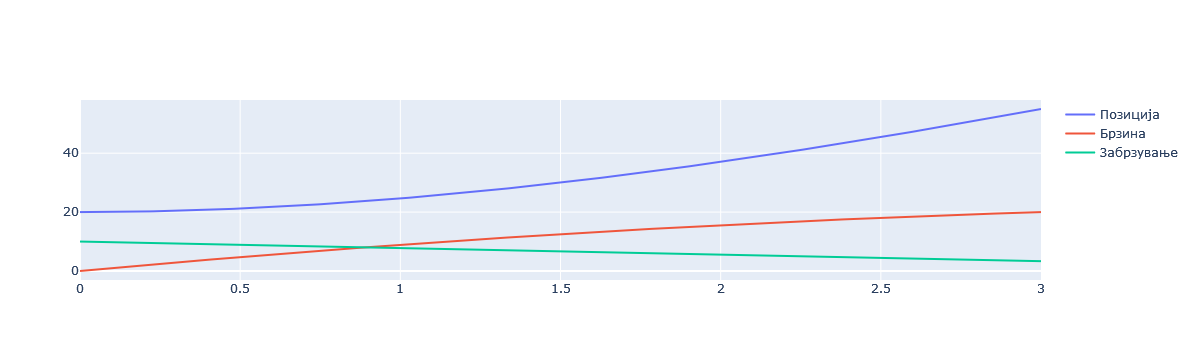

In [108]:
rt.plot_trajectories([(theta1, ti, tf)])

# ispitna

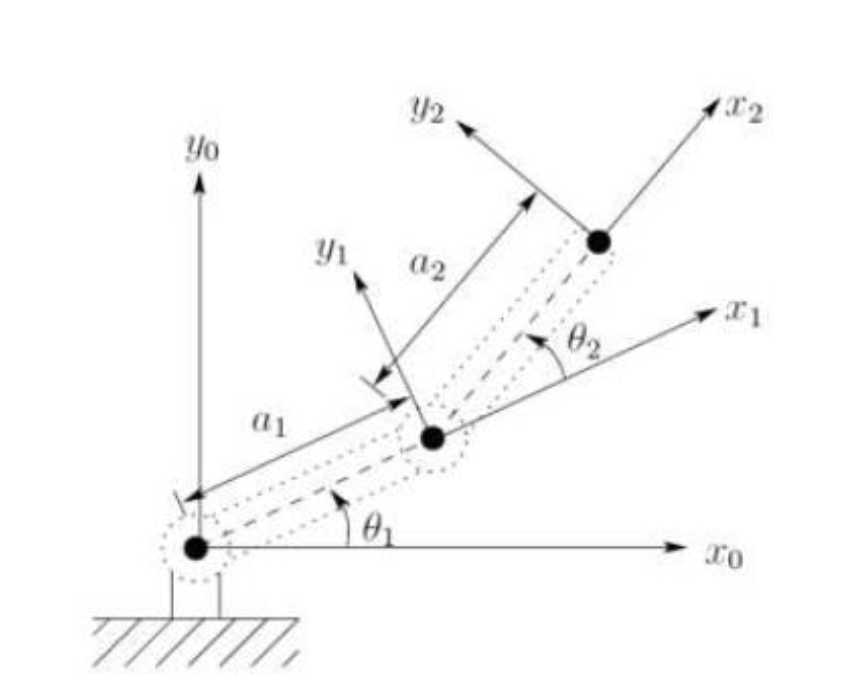

In [132]:
display.Image('images/ispit.png', width=700)

In [72]:
# a) jakobijan
theta1, theta2, l1, l2  = sp.symbols('theta1, theta2, l1, l2')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1, 0, l1, 0)
robot.add_revolute_joint(theta2, 0, l2, 0)
robot.add_subs([(l1, 1),(l2, 1)])
robot.interact()

In [73]:
J= robot.jacobian()
J

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎢l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎥
⎢                                               ⎥
⎢              0                       0        ⎥
⎢                                               ⎥
⎢              0                       0        ⎥
⎢                                               ⎥
⎢              0                       0        ⎥
⎢                                               ⎥
⎣              1                       1        ⎦

In [74]:
Jv= robot.linear_jacobian()
Jv

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎢l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎥
⎢                                               ⎥
⎣              0                       0        ⎦

In [75]:
Jvv=Jv[:2,:]
Jvv

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎦

In [138]:
# b) inverzen J
Jinv= Jvv.inv()
Jinv

⎡                     -cos(θ₁ + θ₂)                                           
⎢   ─────────────────────────────────────────────────         ────────────────
⎢   l₁⋅sin(θ₁)⋅cos(θ₁ + θ₂) - l₁⋅sin(θ₁ + θ₂)⋅cos(θ₁)         l₁⋅sin(θ₁)⋅cos(θ
⎢                                                                             
⎢             -l₁⋅cos(θ₁) - l₂⋅cos(θ₁ + θ₂)                             -l₁⋅si
⎢────────────────────────────────────────────────────────  ───────────────────
⎣-l₁⋅l₂⋅sin(θ₁)⋅cos(θ₁ + θ₂) + l₁⋅l₂⋅sin(θ₁ + θ₂)⋅cos(θ₁)  -l₁⋅l₂⋅sin(θ₁)⋅cos(

  -sin(θ₁ + θ₂)                      ⎤
─────────────────────────────────    ⎥
₁ + θ₂) - l₁⋅sin(θ₁ + θ₂)⋅cos(θ₁)    ⎥
                                     ⎥
n(θ₁) - l₂⋅sin(θ₁ + θ₂)              ⎥
─────────────────────────────────────⎥
θ₁ + θ₂) + l₁⋅l₂⋅sin(θ₁ + θ₂)⋅cos(θ₁)⎦

In [76]:
T= robot.get_dh_matrix()
T

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

In [77]:
Jvv1=Jvv.subs(theta1, 167.028).subs(theta2,-154.44).subs(l1,2).subs(l2,3)
Jvv1

⎡0.935100593612774  -0.0648830975995719⎤
⎢                                      ⎥
⎣1.26723805852348    2.99929828187293  ⎦

In [78]:
linearna=Jvv1*sp.Matrix([1,3])
linearna

⎡0.740451300814058⎤
⎢                 ⎥
⎣10.2651329041423 ⎦

In [79]:
#v)
F=sp.Matrix([30,-20])
F

⎡30 ⎤
⎢   ⎥
⎣-20⎦

In [80]:
T=Jvv1.T*F
T

⎡2.70825663791362 ⎤
⎢                 ⎥
⎣-61.9324585654457⎦

# Teorija

## Дали со RPY ротациите локалниот (подвижниот) координатен систем ја менува својата позиција во просторот? Објаснете!
* Не, бидејќи движењата поврзани со RPY ротациите се во однос на подвижниот координатен систем.

## Што дефинира Јакобијанот на една роботска рака?
* Со Јакобијанот на една роботска рака со повеќе степени слобода на
движење е определена врската помеѓу диференцијалното движење на
зглобовите од раката и диференцијалното движење на самата рака.

## Што претставуваат елементите на матрицата на центрифугални сили?
* Елементите на матрицата на центрифугални сили ги претставуваат
центрифугалните сили кои дејствуваат во еден зглоб како резултат од
дејството на брзината на другите зглобови

## Што значи tb> tf/2, ако tb e времето на спојување на параболичен сегмент со линеарен сегмент кај траекториите кои се состојат од линеарен сегмент и по еден параболичен сегмент на неговиот почеток и крај? Дали tb може да биде поголемо од половината од времето на целото движење tf ?
* Времето tb не може да биде поголемо од половината од времето на
целото движење tf кај траекториите со линеарни и параболични сегменти. Од
друга страна, tb=tf/2 значи дека патеката ќе се состои само од два
параболични сегмента, без линеарен сегмент помеѓу нив, па роботската рака
ќе забрзува и успорува по параболичен закон, без да постои дел од патеката на
која забрзувањето ќе биде нулево.

## За пресметување на Јакобијанот на една роботска рака потребни се само третата и четвртата колона од соодветните трансформациони матрици

# extras

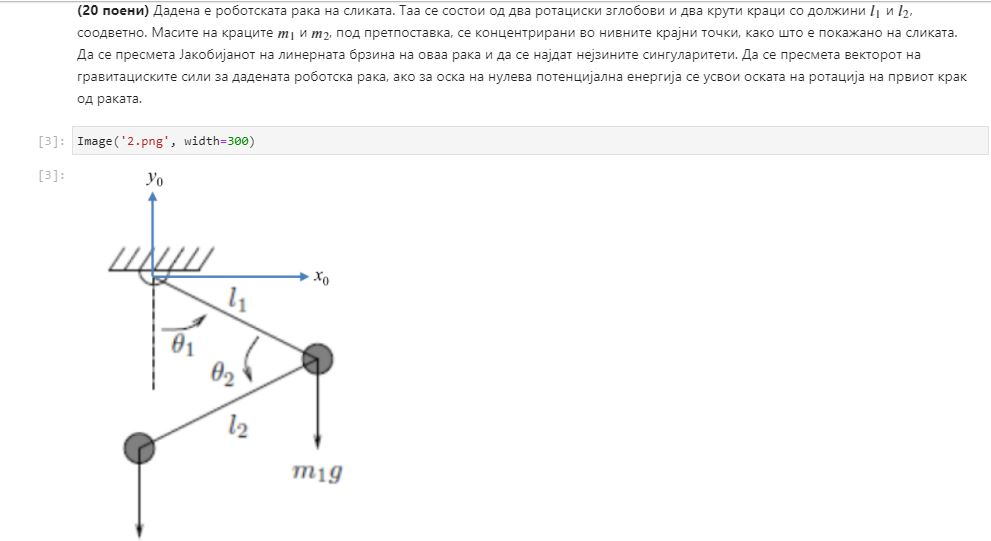

In [31]:
display.Image('images/extra_3.png', width=700)

In [58]:
m1, m2, g, l1, l2 = sp.symbols('m1, m2, g, l1, l2')
theta1, theta2= mechanics.dynamicsymbols('theta1, theta2')

In [59]:
x1=l1*sp.sin(theta1)
y1=-l1*sp.cos(theta1)
v12=x1.diff(t)**2+y1.diff(t)**2
v12=v12.simplify()
v12

  2   2
l₁ ⋅θ₁̇ 

In [60]:
x2=l1*sp.sin(theta1)-l2*sp.sin(theta1-theta2)
y2=-l1*sp.cos(theta1)+l2*sp.cos(theta1-theta2)
v22=x2.diff(t)**2+y2.diff(t)**2
v22=v22.simplify()
v22

  2   2                     2                             2   2       2       
l₁ ⋅θ₁̇  - 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₁̇  - 2⋅l₂ ⋅θ

    2   2
₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ 

In [43]:
K= m1*v12/2+m2*v22/2
K = K.simplify()
K

  2      2      ⎛                                                 2           
l₁ ⋅m₁⋅θ₁̇    m₂⋅⎝(l₁⋅sin(θ₁)⋅θ₁̇ - l₂⋅(θ₁̇ - θ₂̇)⋅sin(θ₁ - θ₂ + 180))  + (l₁⋅
────────── + ─────────────────────────────────────────────────────────────────
    2                                                             2           

                                         2⎞
cos(θ₁)⋅θ₁̇ + l₂⋅(θ₁̇ - θ₂̇)⋅cos(θ₁ - θ₂ + 180)) ⎠
───────────────────────────────────────────
                                           

In [42]:
P=(m1+m2)*g*sp.cos(theta1)+m2*g*l2*sp.cos(theta1+180-theta2)
P

g⋅l₂⋅m₂⋅cos(θ₁ - θ₂ + 180) + g⋅(m₁ + m₂)⋅cos(θ₁)

In [44]:
L= K-P
L

                                                      2      2      ⎛         
                                                    l₁ ⋅m₁⋅θ₁̇    m₂⋅⎝(l₁⋅sin(
-g⋅l₂⋅m₂⋅cos(θ₁ - θ₂ + 180) - g⋅(m₁ + m₂)⋅cos(θ₁) + ────────── + ─────────────
                                                        2                     

                                        2                                     
θ₁)⋅θ₁̇ - l₂⋅(θ₁̇ - θ₂̇)⋅sin(θ₁ - θ₂ + 180))  + (l₁⋅cos(θ₁)⋅θ₁̇ + l₂⋅(θ₁̇ - θ₂
──────────────────────────────────────────────────────────────────────────────
                                        2                                     

               2⎞
̇)⋅cos(θ₁ - θ₂ + 180)) ⎠
─────────────────
                 

In [45]:
rt.lagrangian(L,[theta1, theta2])

⎡                                                              2           2  
⎢-g⋅l₂⋅m₂⋅sin(θ₁ - θ₂ + 180) - g⋅m₁⋅sin(θ₁) - g⋅m₂⋅sin(θ₁) + l₁ ⋅m₁⋅θ₁̈ + l₁ ⋅
⎢                                                                             
⎢                                                                             
⎣                                                                             

     2            2       2                                                   
m₂⋅sin (θ₁)⋅θ₁̈ + l₁ ⋅m₂⋅cos (θ₁)⋅θ₁̈ - 2⋅l₁⋅l₂⋅m₂⋅sin(θ₁ - θ₂ + 180)⋅sin(θ₁)⋅
                                                                              
                                                                              
                                                                              

                                                                              
θ₁̈ + l₁⋅l₂⋅m₂⋅sin(θ₁ - θ₂ + 180)⋅sin(θ₁)⋅θ₂̈ - 2⋅l₁⋅l₂⋅m₂⋅sin(θ₁ - θ₂ + 180)⋅
                                                  

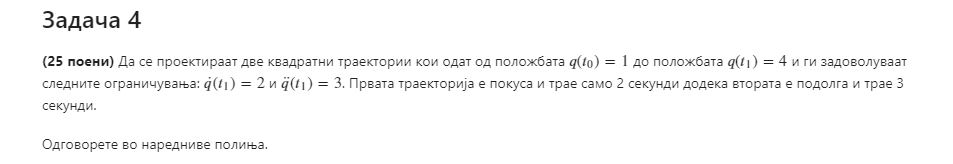

In [46]:
display.Image('images/extra_4.jpg', width=700)

In [47]:
def trajectory_polynomial_2_3(ti, tf, xf, vf, af):
    theta, symbols = rt.polynomial(2)
    v_theta = theta.diff('t')
    a_theta = theta.diff('t', 2)
    eq_xf = theta.subs('t', tf) - xf
    eq_vf = v_theta.subs('t', tf) - vf
    eq_af = a_theta.subs('t', tf) - af
    solution = sp.linsolve([eq_xf, eq_vf, eq_af], symbols)
    for sub in zip(symbols, solution.args[0]):
        theta = theta.subs(*sub)
    return theta, solution

In [48]:
def trajectory_polynomial_2_1(ti, tf, xi, xf, vf):
    theta, symbols = rt.polynomial(2)
    v_theta = theta.diff('t')
    a_theta = theta.diff('t', 2)
    eq_xi = theta.subs('t', ti) - xi
    eq_xf = theta.subs('t', tf) - xf
    eq_vf = v_theta.subs('t', tf) - vf
    solution = sp.linsolve([eq_xi, eq_xf, eq_vf], symbols)
    for sub in zip(symbols, solution.args[0]):
        theta = theta.subs(*sub)
    return theta, solution

In [54]:
ti, tf= 0, 2
theta1, solution = trajectory_polynomial_2_1(ti, tf, xi=1, xf=11.5, vf=-7)
theta1, solution

⎛         2                                      ⎞
⎝- 6.125⋅t  + 17.5⋅t + 1.0, {(1.0, 17.5, -6.125)}⎠

In [55]:
ti, tf= 2, 5
theta2, solution = trajectory_polynomial_2_1(ti, tf, xi=11.5, xf=4, vf=2)
theta2, solution

⎛     2                                      ⎞
⎝1.5⋅t  - 13.0⋅t + 31.5, {(31.5, -13.0, 1.5)}⎠

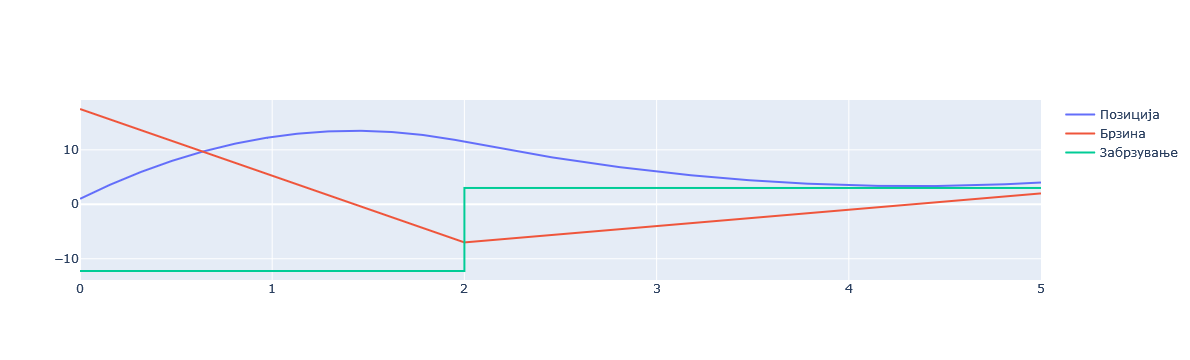

In [56]:
rt.plot_trajectories([(theta1, 0, 2), (theta2, 2, 5)])